In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data
data.conf.remote_timeout = 60

from spectral_cube import SpectralCube

#from astroquery.esasky import ESASky
#from astroquery.utils import TableList
from astropy.wcs import WCS
#from reproject import reproject_interp



In [3]:
loc = '/scratch3/projects/meerchoirs/jcviljoen/output_pbcorr/cubes/cube_2/moms/'
name= 'pbcorr_J1059_09_HI.image_'
ext = '.fits'
mom0 = 'mom0'
mom1 = 'mom1'
hdu_list = fits.open(loc+name+mom0+ext)
hdu_list.info()
hdu1_list = fits.open(loc+name+mom1+ext)
hdu1_list.info()

Filename: /scratch3/projects/meerchoirs/jcviljoen/output_pbcorr/cubes/cube_2/moms/pbcorr_J1059_09_HI.image_mom0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     776   (2048, 2048)   float64   
Filename: /scratch3/projects/meerchoirs/jcviljoen/output_pbcorr/cubes/cube_2/moms/pbcorr_J1059_09_HI.image_mom1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     776   (2048, 2048)   float64   


In [4]:
data_mom1 = fits.getdata(loc+name+mom1+ext)
header_mom1 = fits.getheader( loc+name+mom1+ext)
data_mom0 = fits.getdata(loc+name+mom0+ext)
header_mom0 = fits.getheader(loc+name+mom0+ext)
print(type(data_mom0))
print(data_mom0.shape)
print(type(data_mom1))
print(data_mom1.shape)

<class 'numpy.ndarray'>
(2048, 2048)
<class 'numpy.ndarray'>
(2048, 2048)


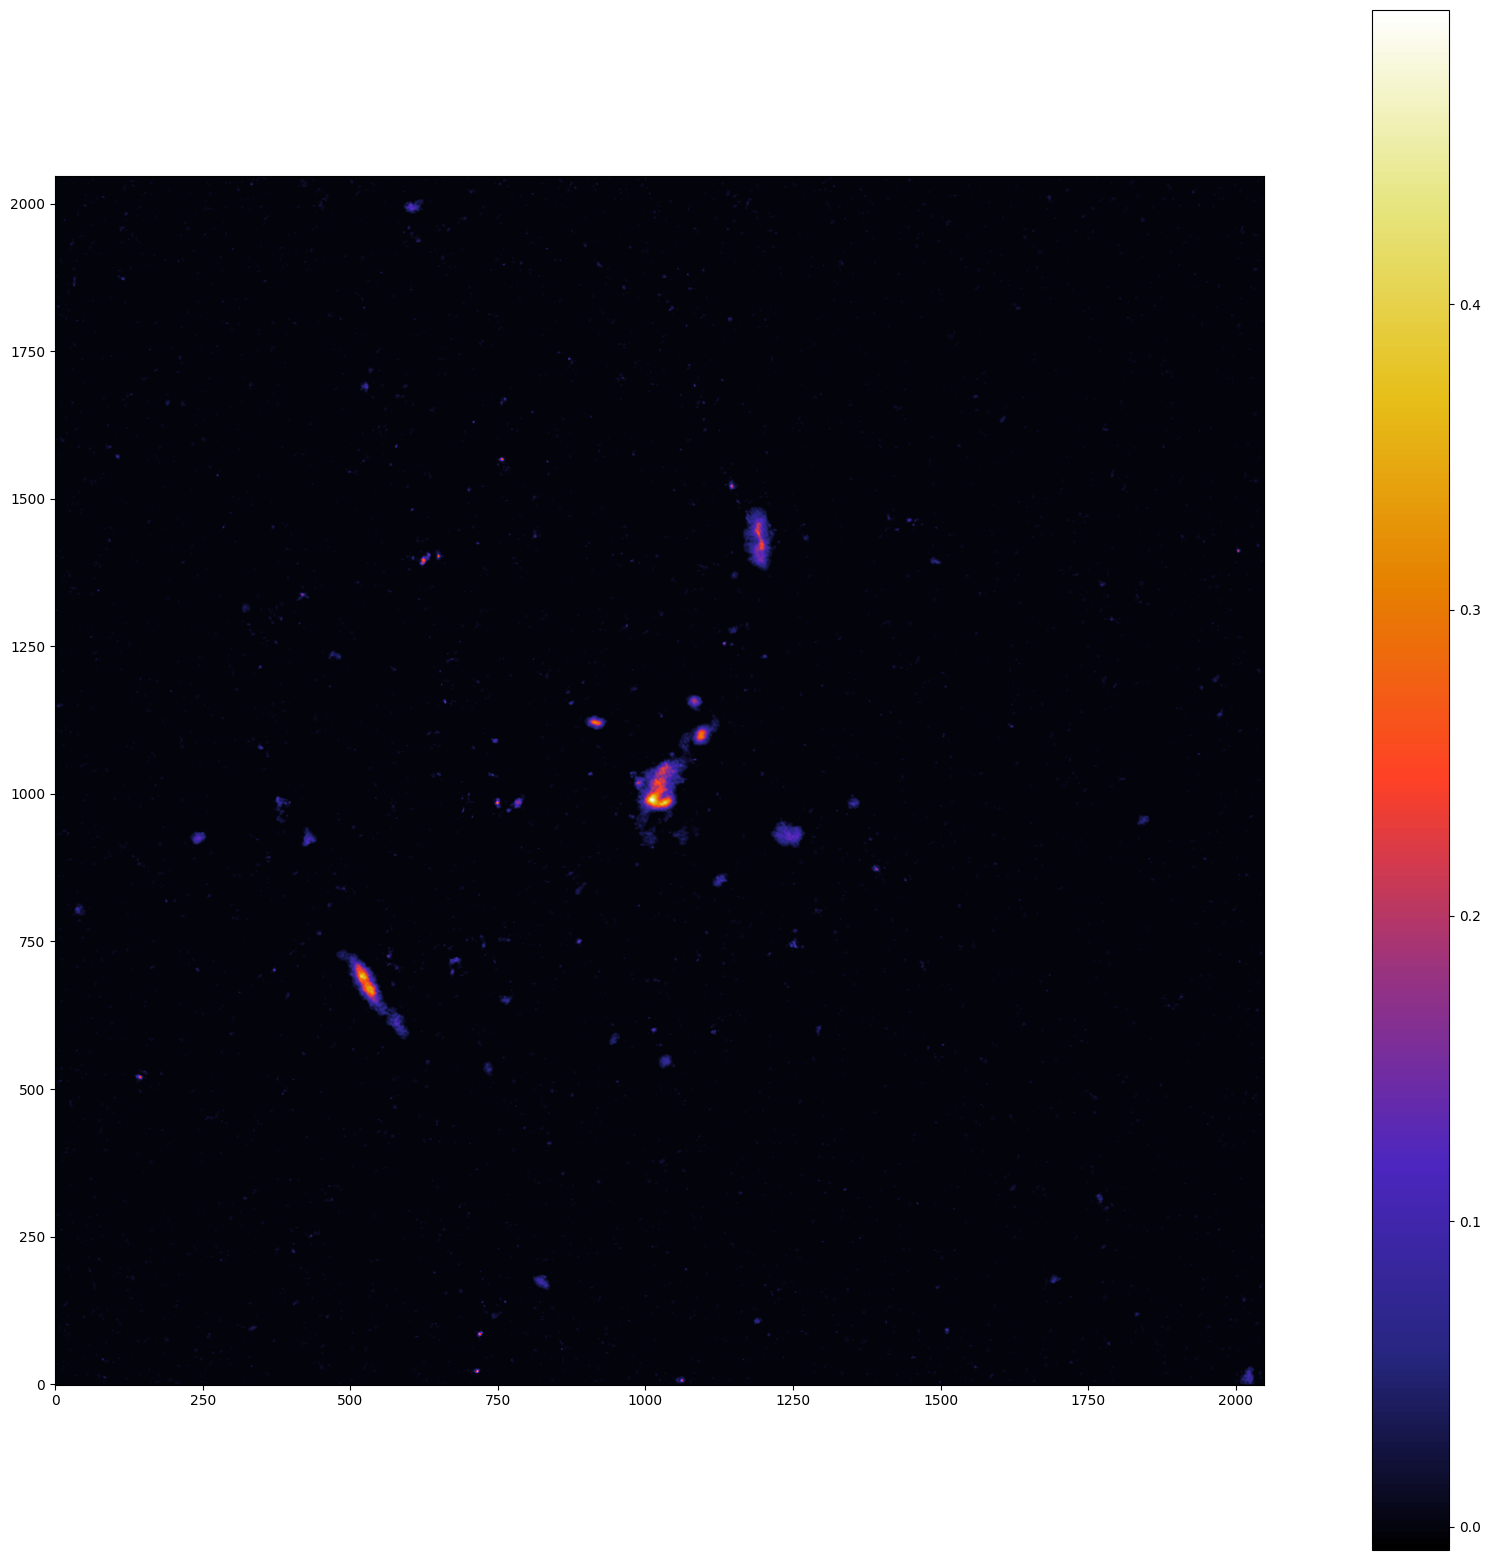

In [4]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot()
im = ax.imshow(data_mom0, cmap='CMRmap')
ax.invert_yaxis()
cbar = plt.colorbar(im, pad=.07)

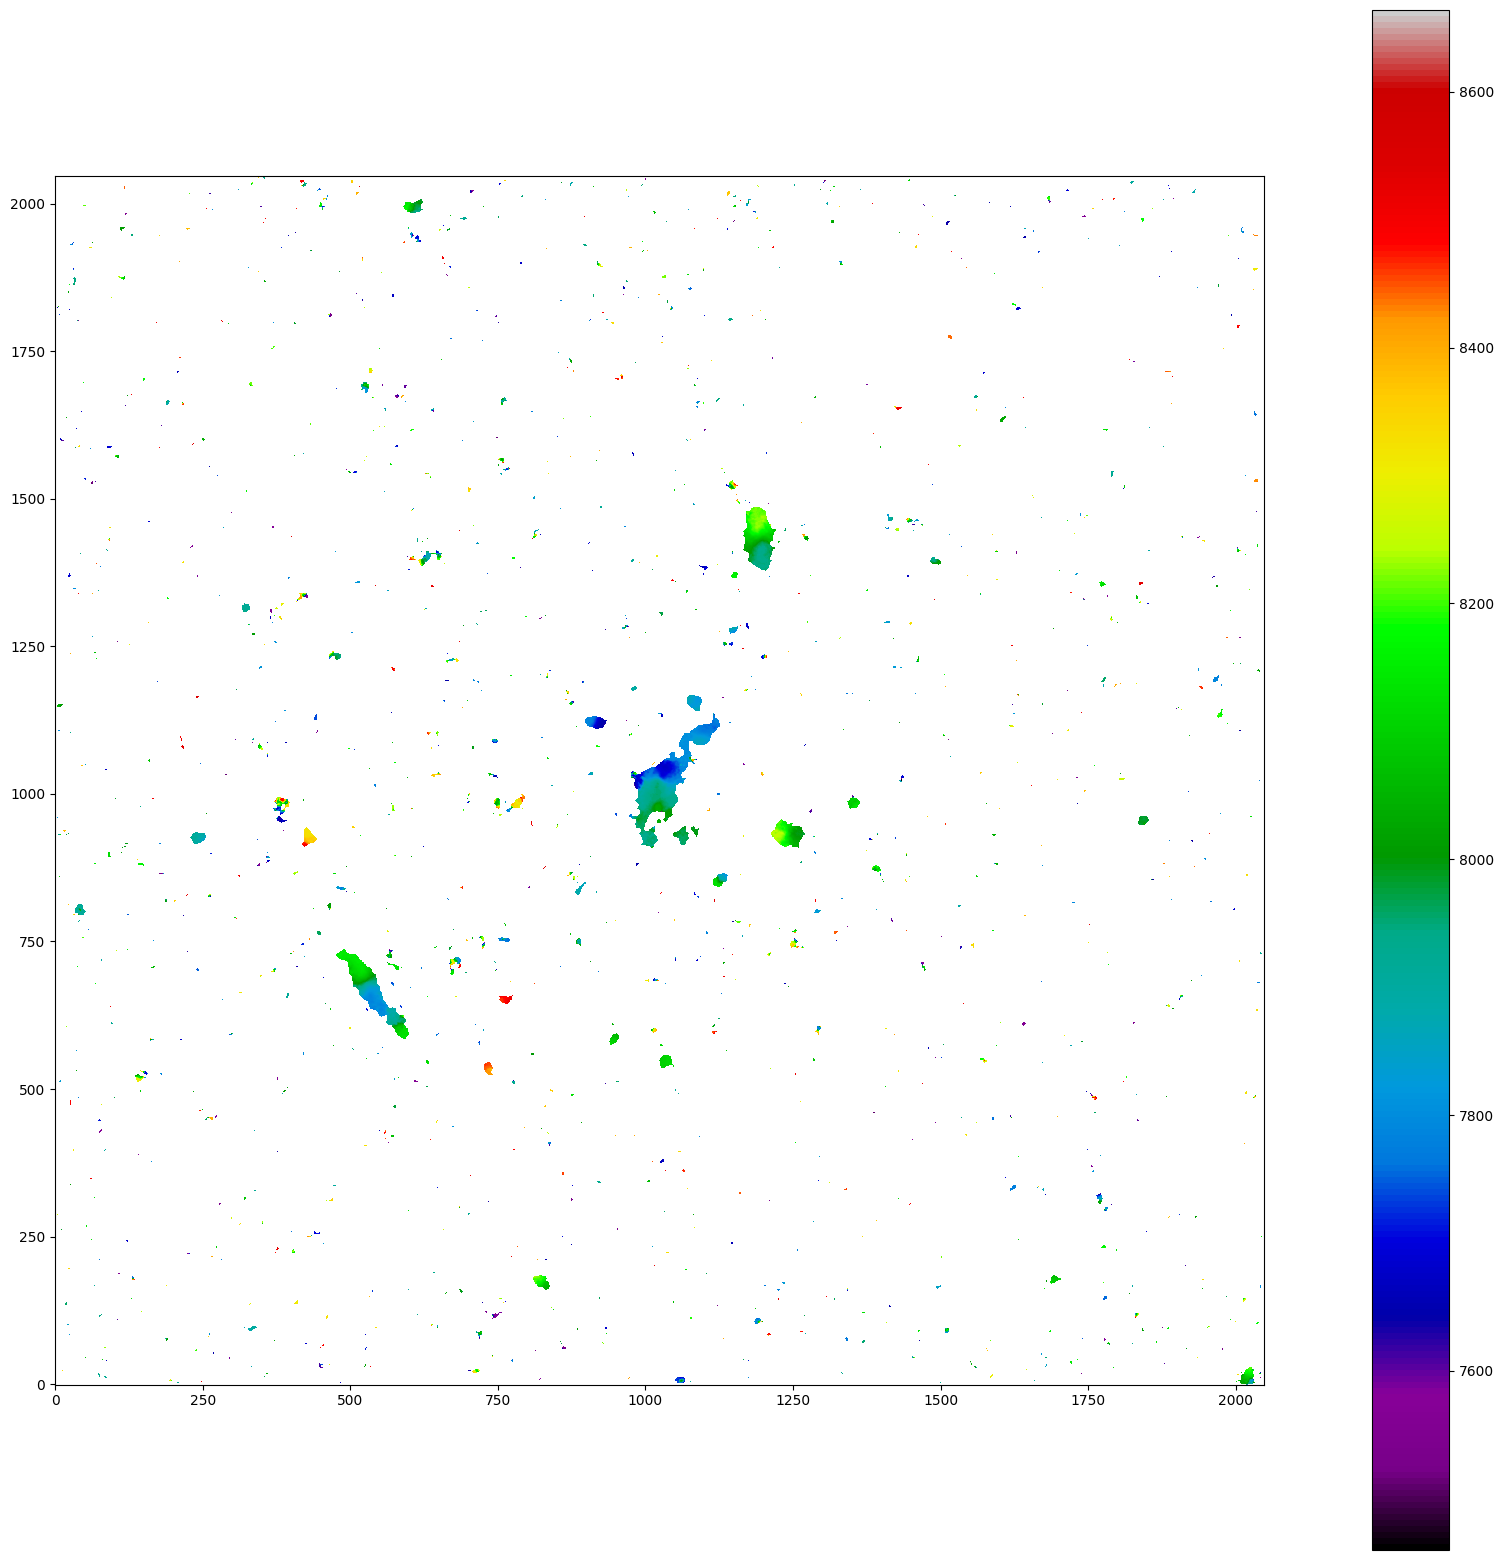

In [5]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot()
im = ax.imshow(data_mom1, cmap='nipy_spectral', vmin=7460, vmax=8664)
ax.invert_yaxis()
cbar = plt.colorbar(im, pad=.07)

In [5]:
print('Min:', np.min(data_mom0))
print('Max:', np.max(data_mom0))
print('Mean:', np.mean(data_mom0))
print('Stdev:', np.std(data_mom0))
rms = np.sqrt(np.mean(data_mom0**2))
print(rms)
print('Min:', np.min(data_mom1))
print('Max:', np.max(data_mom1))
print('Mean:', np.mean(data_mom1))
print('Stdev:', np.std(data_mom1))
rms1 = np.sqrt(np.mean(data_mom1**2))
print(rms1)

Min: -0.00760085124143773
Max: 0.4962808028056138
Mean: 0.0007361853905800649
Stdev: 0.009336759265348967
0.009365737691628106
Min: nan
Max: nan
Mean: nan
Stdev: nan
nan


In [7]:
bmaj = 5.781529598630*10**(-3)*3600 
bmin = 4.197591503940*10**(-3)*3600
print(np.round(bmaj,2), np.round(bmin,2))

20.81 15.11


In [8]:
NHI = (1.104*10**(24))*(data_mom0)*(bmaj*bmin)**(-1)

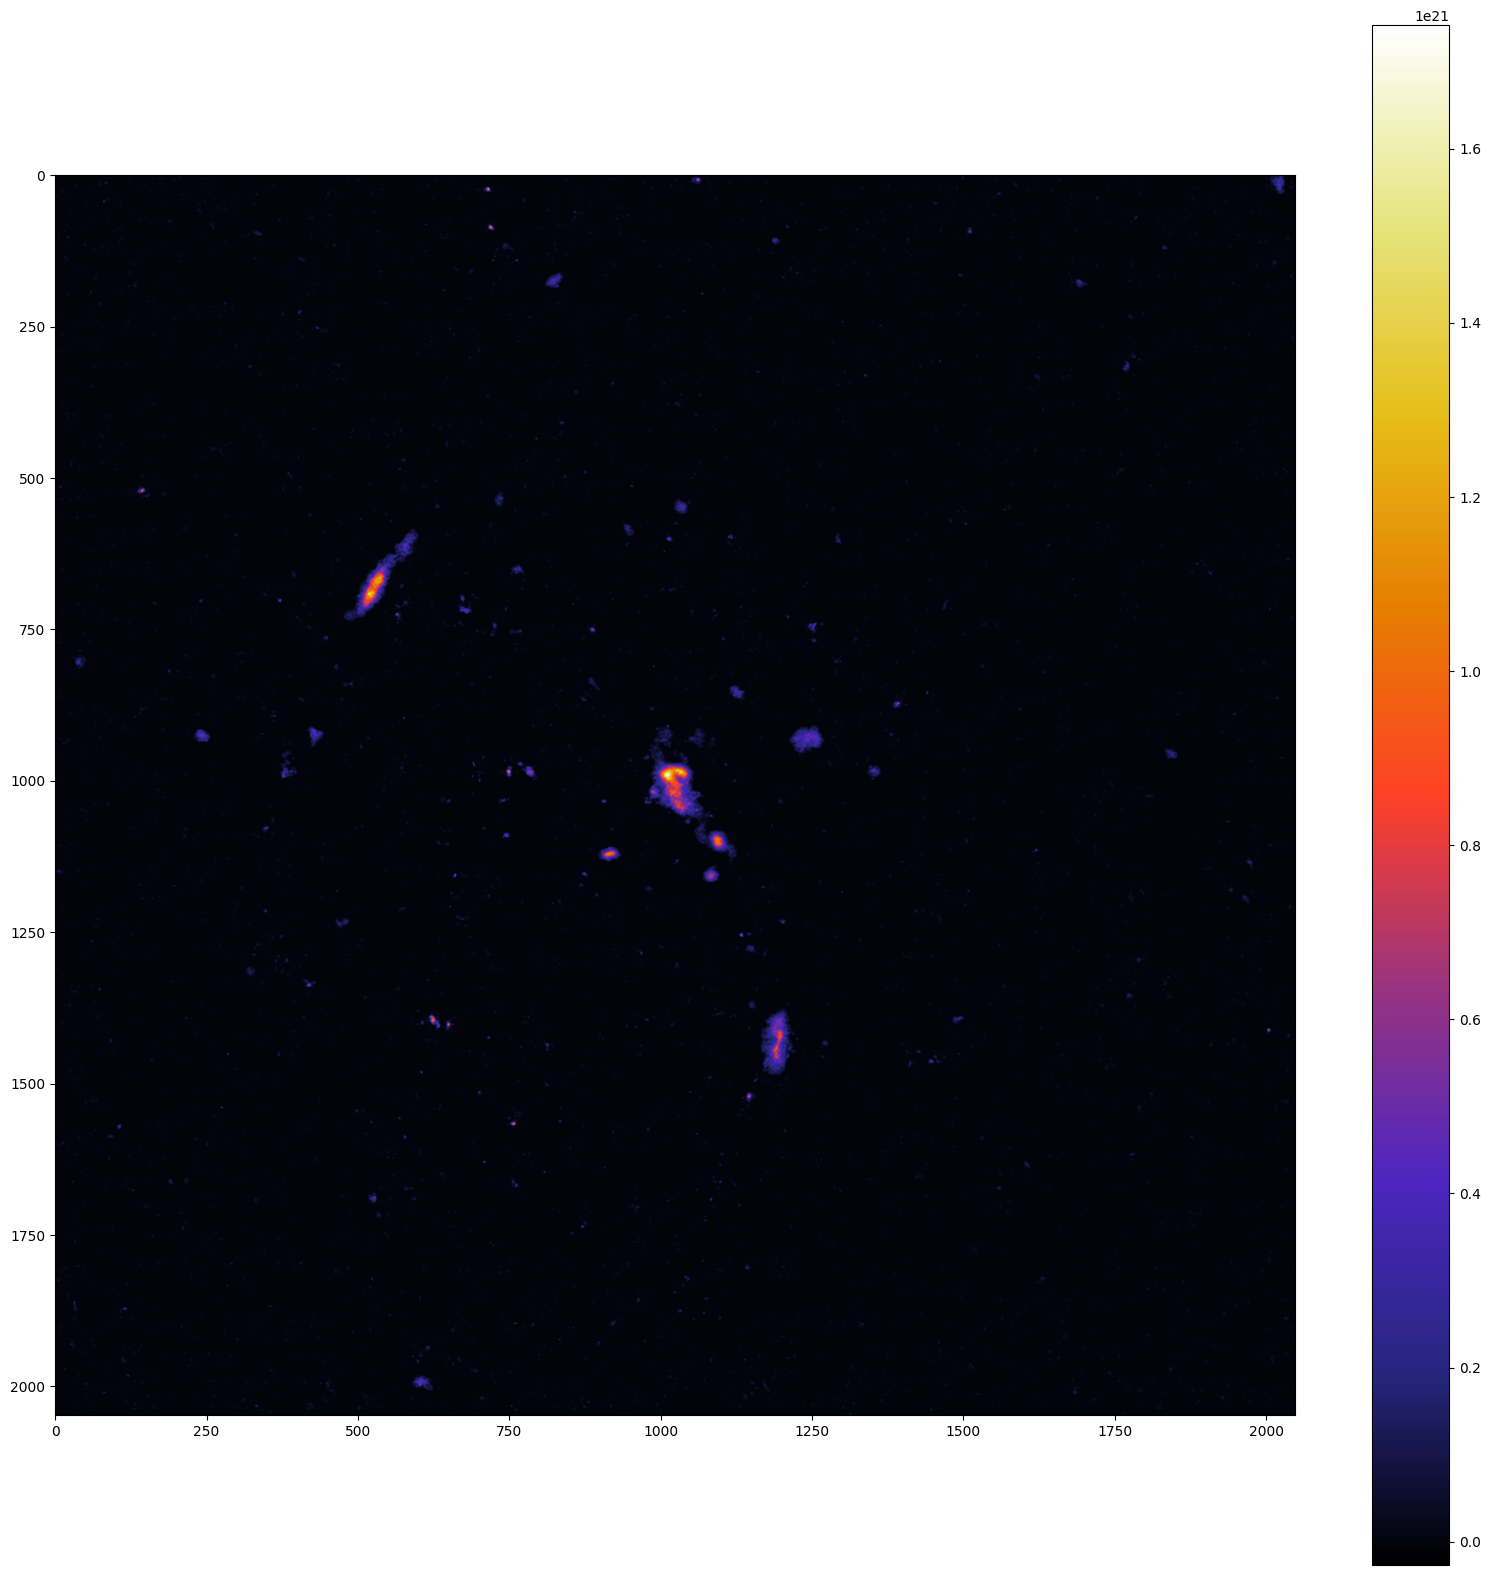

In [9]:
plt.figure(figsize = (20,20))
plt.imshow(NHI, cmap='CMRmap')
plt.colorbar()

In [9]:
dx = (5.555555555556*10**(-4)*3600)
dy = dx
Dl = 122
dv = 8544.9290-8539.4159
theta_radian = dx * np.pi / 180 /3600
c = 3*10**8
vmin = 7508.4662 * 10**3 
vmax = 8544.9290 * 10**3 

# arc length = radius * angle
distance_Mpc = Dl * theta_radian

print(distance_Mpc) 
print(dx, dy)
print(np.round((2048*dx)/3600, 2))
print(dv)
print(8544.9290-(188*dv))



0.0011829453819073622
2.00000000000016 2.00000000000016
1.14
5.513100000000122
7508.466199999977


In [11]:
Abeam = (np.pi*bmaj*bmin)/(4*np.log(2)*dx*dy)
print(Abeam)
fluxes = np.array([])
masses = np.array([])
namesmass = np.array([])
namesflux = np.array([])
errmass = np.array([])
errflux = np.array([])

89.09479975133571


In [69]:
def HI_mass(S,name):
    Sv = np.sum(np.sum(S, axis=1))
    MHI = 2.35*10**5*(Dl)**2*(Sv)*(1/Abeam)
    logMHI = np.log10(MHI)
    N = 0
    for i in range(0,len(S)):
        for j in range(0,len(S[0])):
                N += 1
    errsv = np.sqrt(N/Abeam)*dv*np.sqrt(np.mean(S**2))
    errMHI = (logMHI/np.log(10))*(errsv/Sv)
    return '$ ' + str(np.round(logMHI, 2)) + ' \pm ' + str(np.round(errMHI, 3)) +' $ ' +str(np.round(MHI,2))

def flux(S,name):
    Sv = np.sum(np.sum(S, axis=1))
    F = Sv*Abeam/(dv)
    errsv = np.sqrt((len(S)*len(S[0]))/Abeam)*dv*np.sqrt(np.mean(S**2))
    logF = np.log10(F)
    errF = np.abs((logF/np.log(10))*(errsv/Sv))
    return  '$ ' + str(np.round(logF, 5)) + ' \pm ' + str(np.round(errF, 2)) + ' $ ' + str(np.round(F,2))

In [70]:
print(HI_mass(data_mom0,'full'))
print(flux(data_mom0,'full'))


$ 11.08 \pm 0.017 $ 121222229410.49
$ 4.6981 \pm 0.01 $ 49900.35


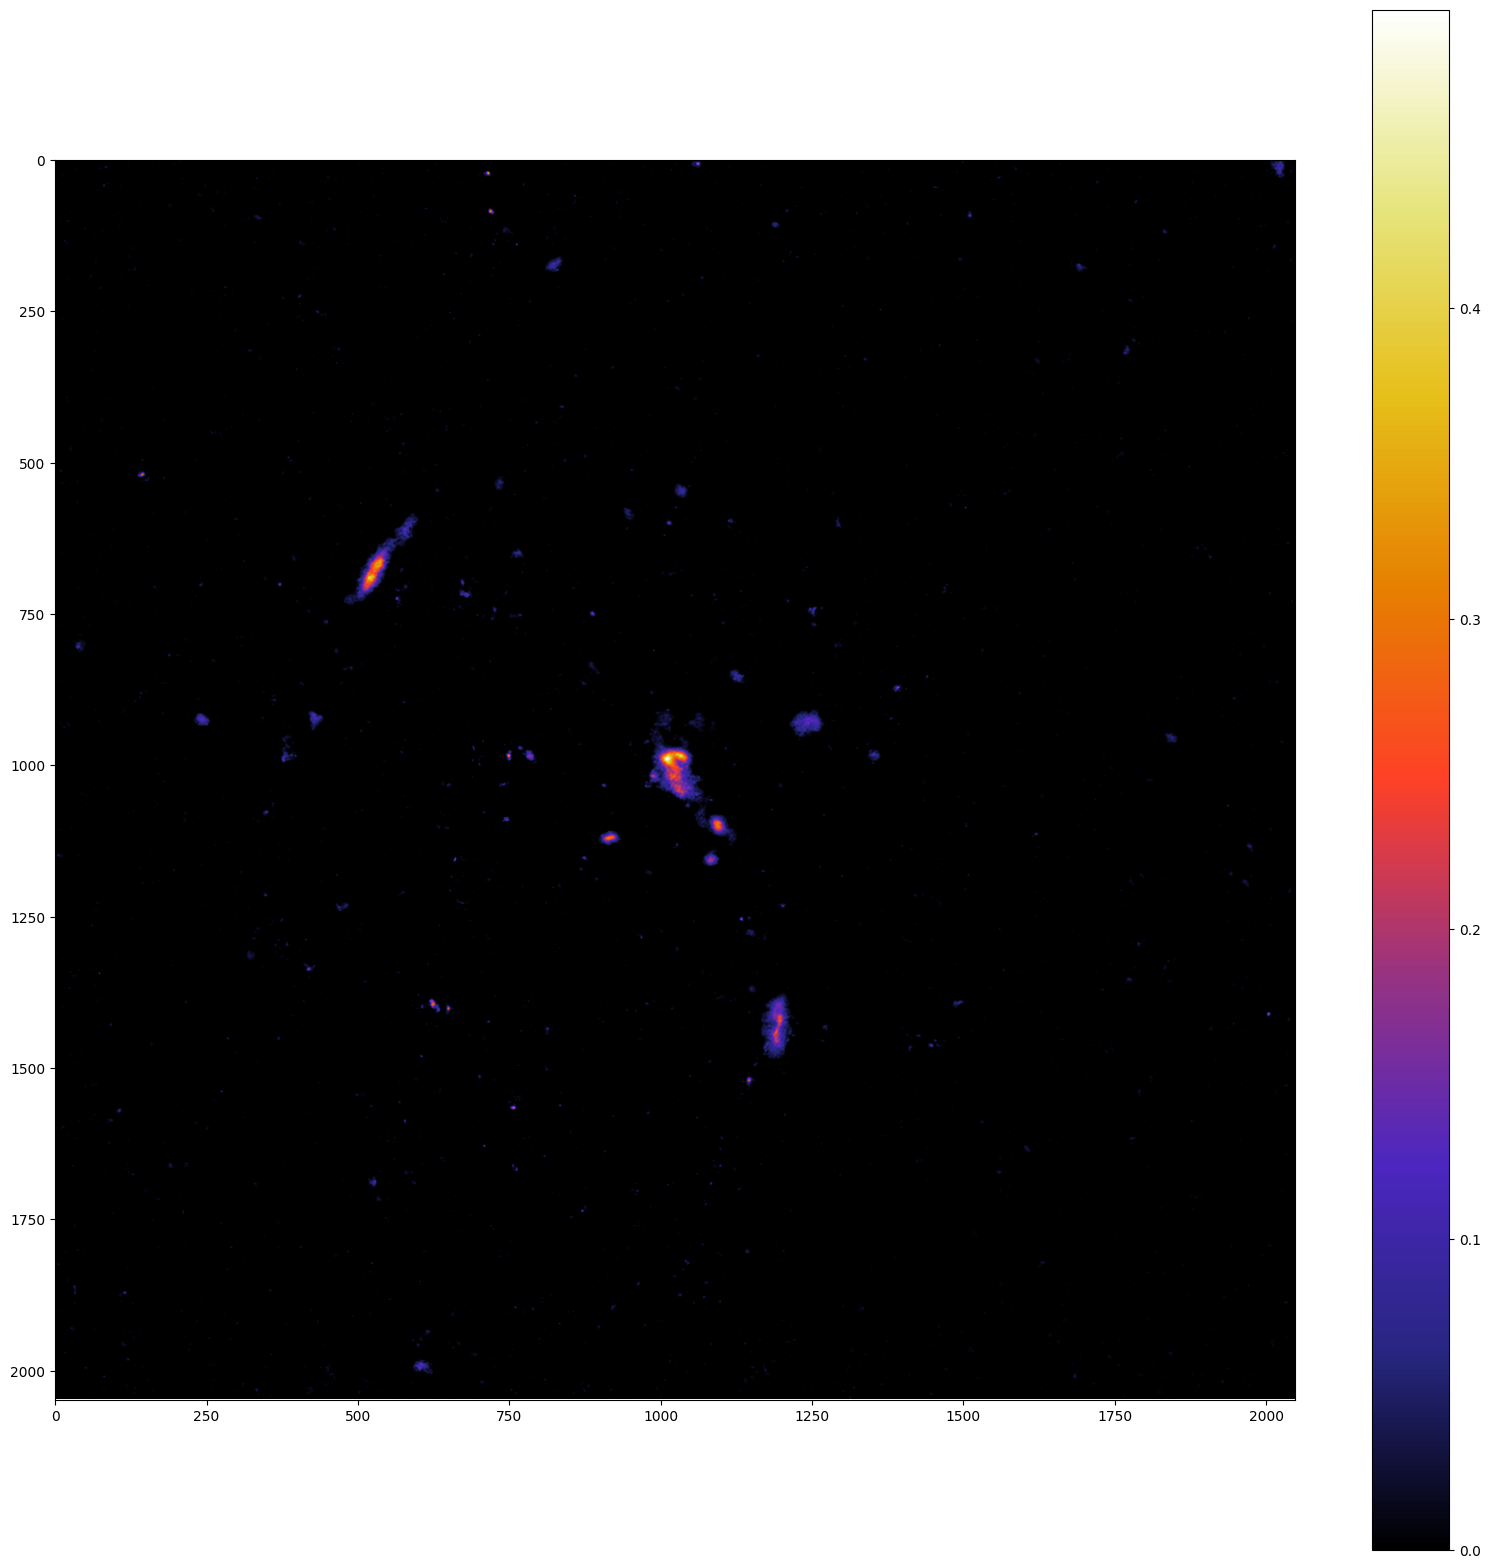

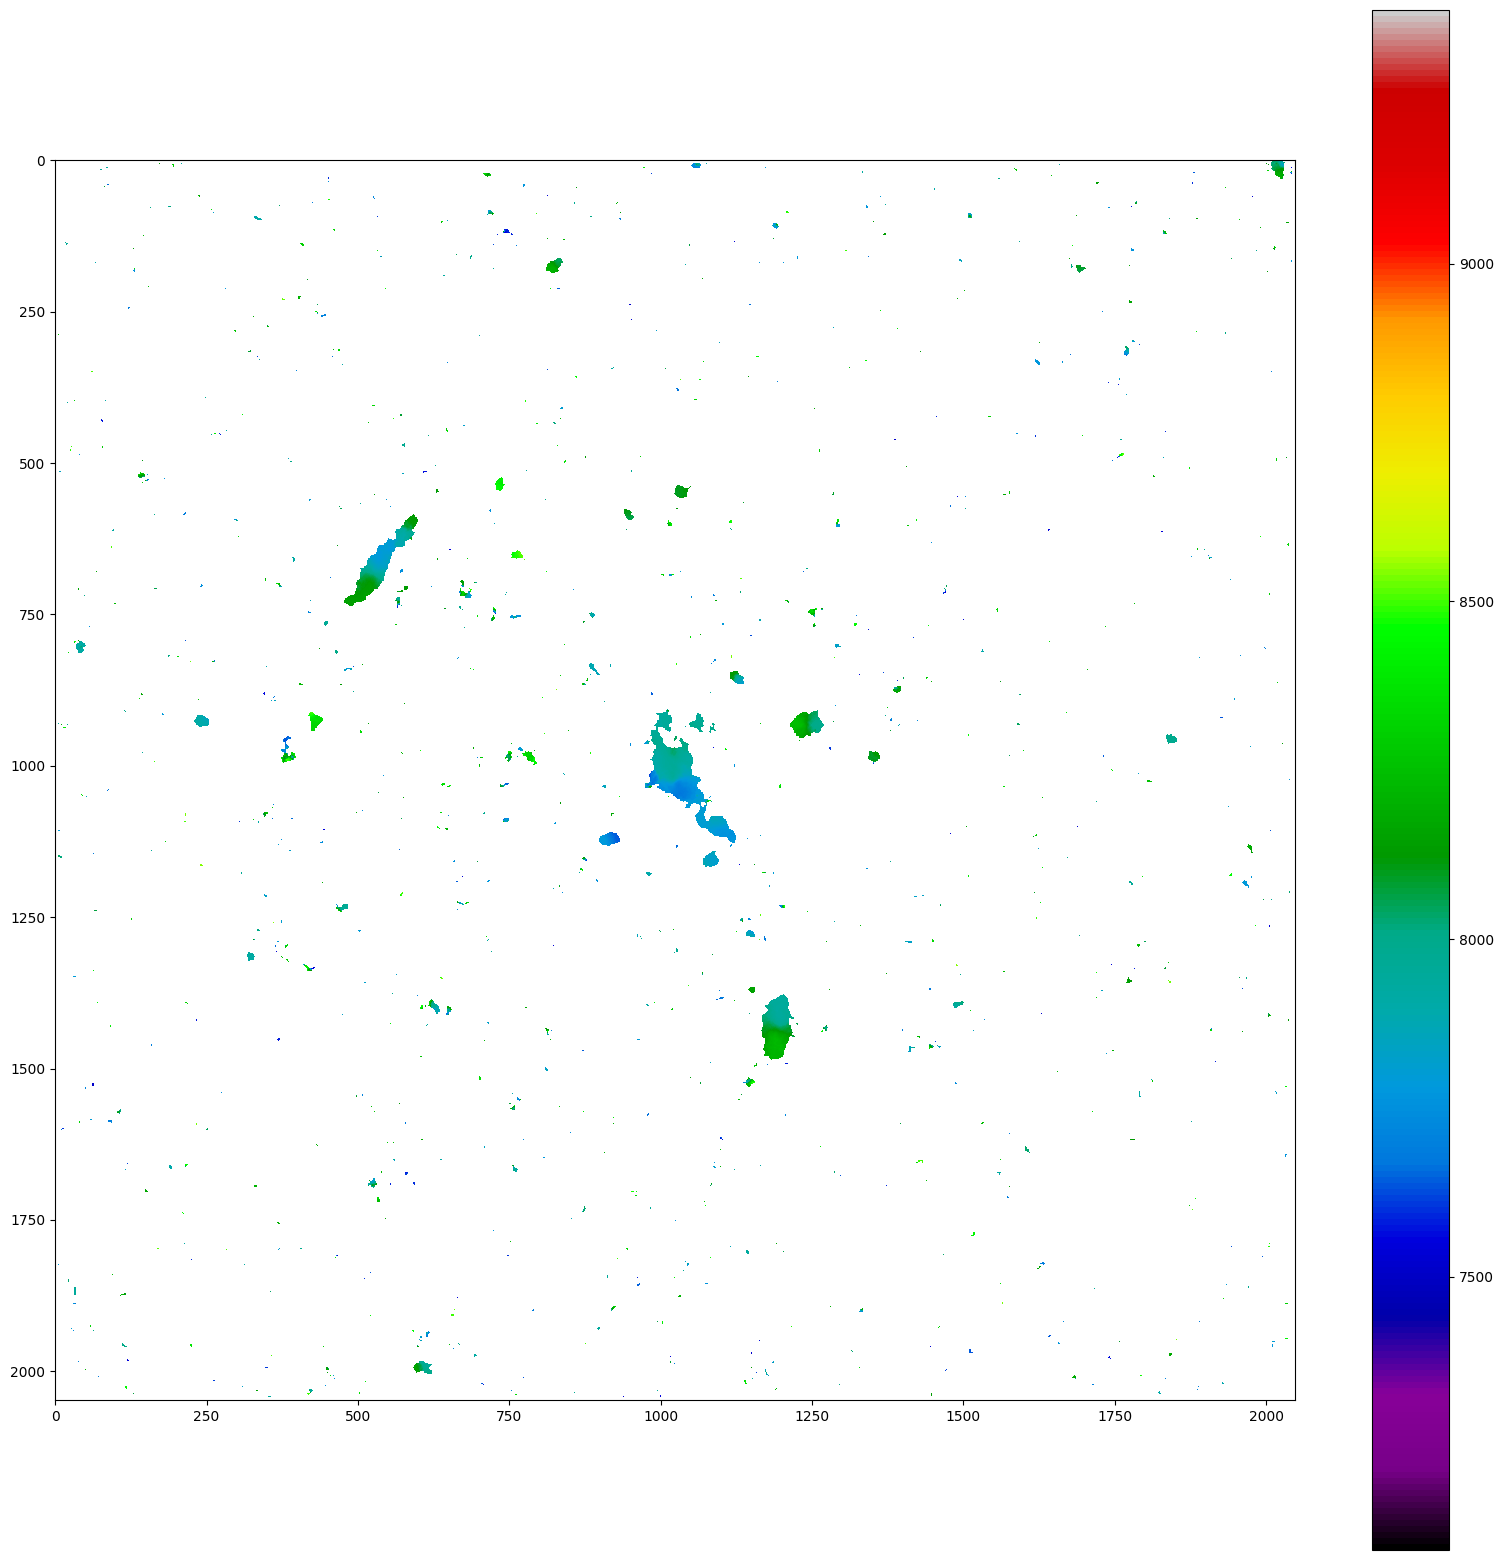

In [14]:
imcopy = np.copy(data_mom0)
mom1copy = np.copy(data_mom1)
for i in range(0, 2048):
    for j in range(0, 2048):
        if imcopy[i,j] < 0.003:
            imcopy[i,j] = 0.0
            mom1copy[i,j] = math.nan

plt.figure(figsize = (20,20))
plt.imshow(imcopy, cmap='CMRmap')
plt.colorbar()

plt.figure(figsize = (20,20))
plt.imshow(mom1copy, cmap='nipy_spectral')
plt.colorbar()

$ 10.57 \pm 0.037 $ 37547677538.79
$ 4.1891 \pm 0.01 $ 15456.26


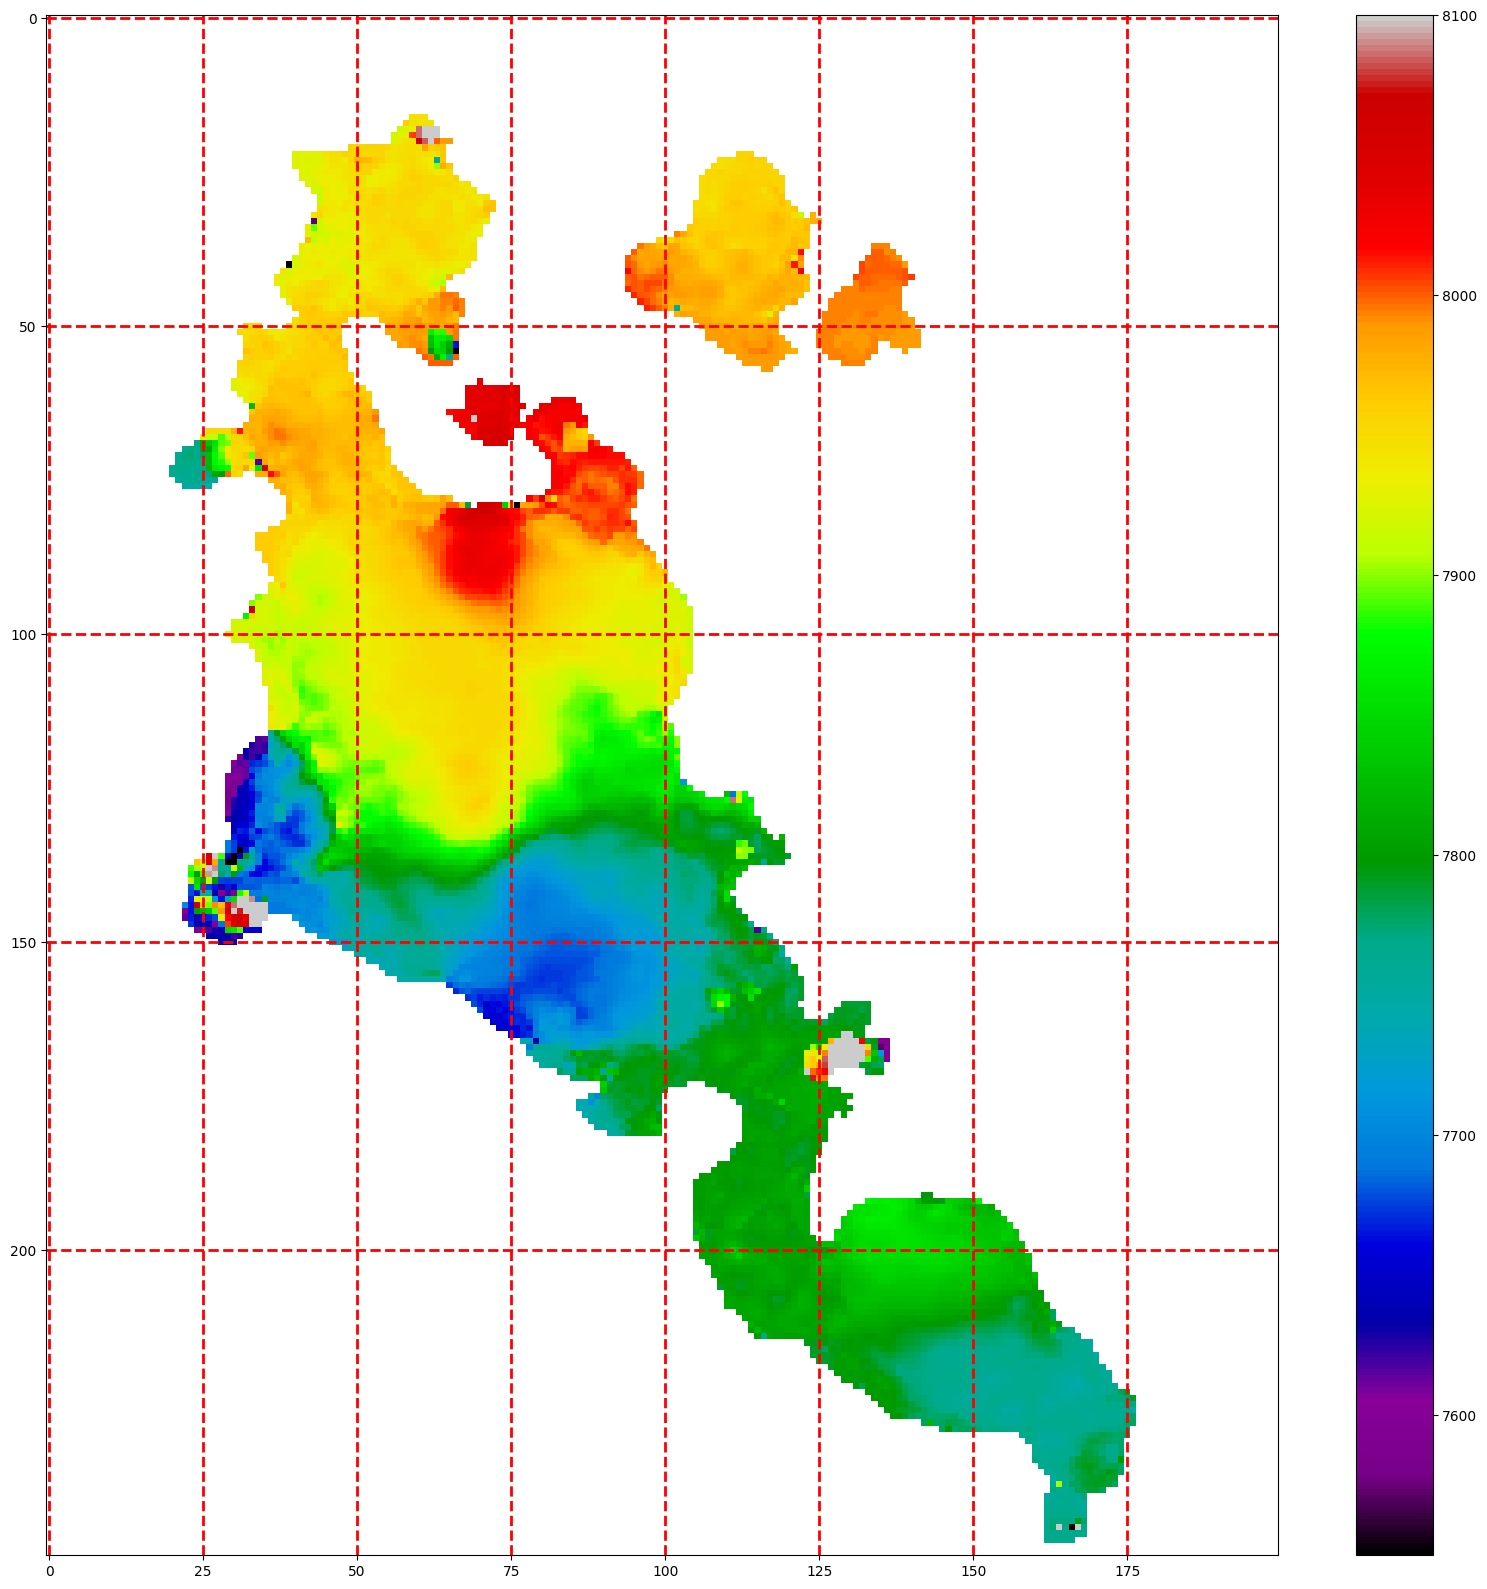

In [71]:
S1237 = data_mom0[890:1140,950:1150]
S1237_mom1 = data_mom1[890:1140,950:1150]
S1237_copy = np.copy(S1237)
S1237_copy_mom1 = np.copy(S1237_mom1)
m = 250
l = 200
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if S1237_copy[i,j] != 0.0:
                flag = False
                for k in range(1,5):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if S1237_copy[i+k,j+k] == 0.0 and S1237_copy[i-k,j+k] == 0.0 and S1237_copy[i+k,j-k] == 0.0 and S1237_copy[i-k,j-k] == 0.0:
                            flag = True
                        if S1237_copy[i+k,j] == 0.0 and S1237_copy[i-k,j] == 0.0 and S1237_copy[i,j-k] == 0.0 and S1237_copy[i,j+k] == 0.0:
                            flag = True
                            
                if j > 150 and j < 175 and i > 200 and i < 250:
                    flag = False
                if j < 5:
                    flag = True
                if i > 247:
                    flag = True
                if j > 197:
                    flag = True
                
                if flag:
                    S1237_copy[i,j] = 0.0
                    S1237_copy_mom1[i,j] = math.nan  
                
print(HI_mass(S1237,'S1237'))
print(flux(S1237,'S1237'))
plt.figure(figsize = (20,20))
plt.imshow(S1237_copy_mom1, cmap='nipy_spectral', vmin=7550, vmax=8100)
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

$ 10.68 \pm 0.031 $ 47614396811.82
$ 4.29226 \pm 0.01 $ 19600.16
10.68 0.03


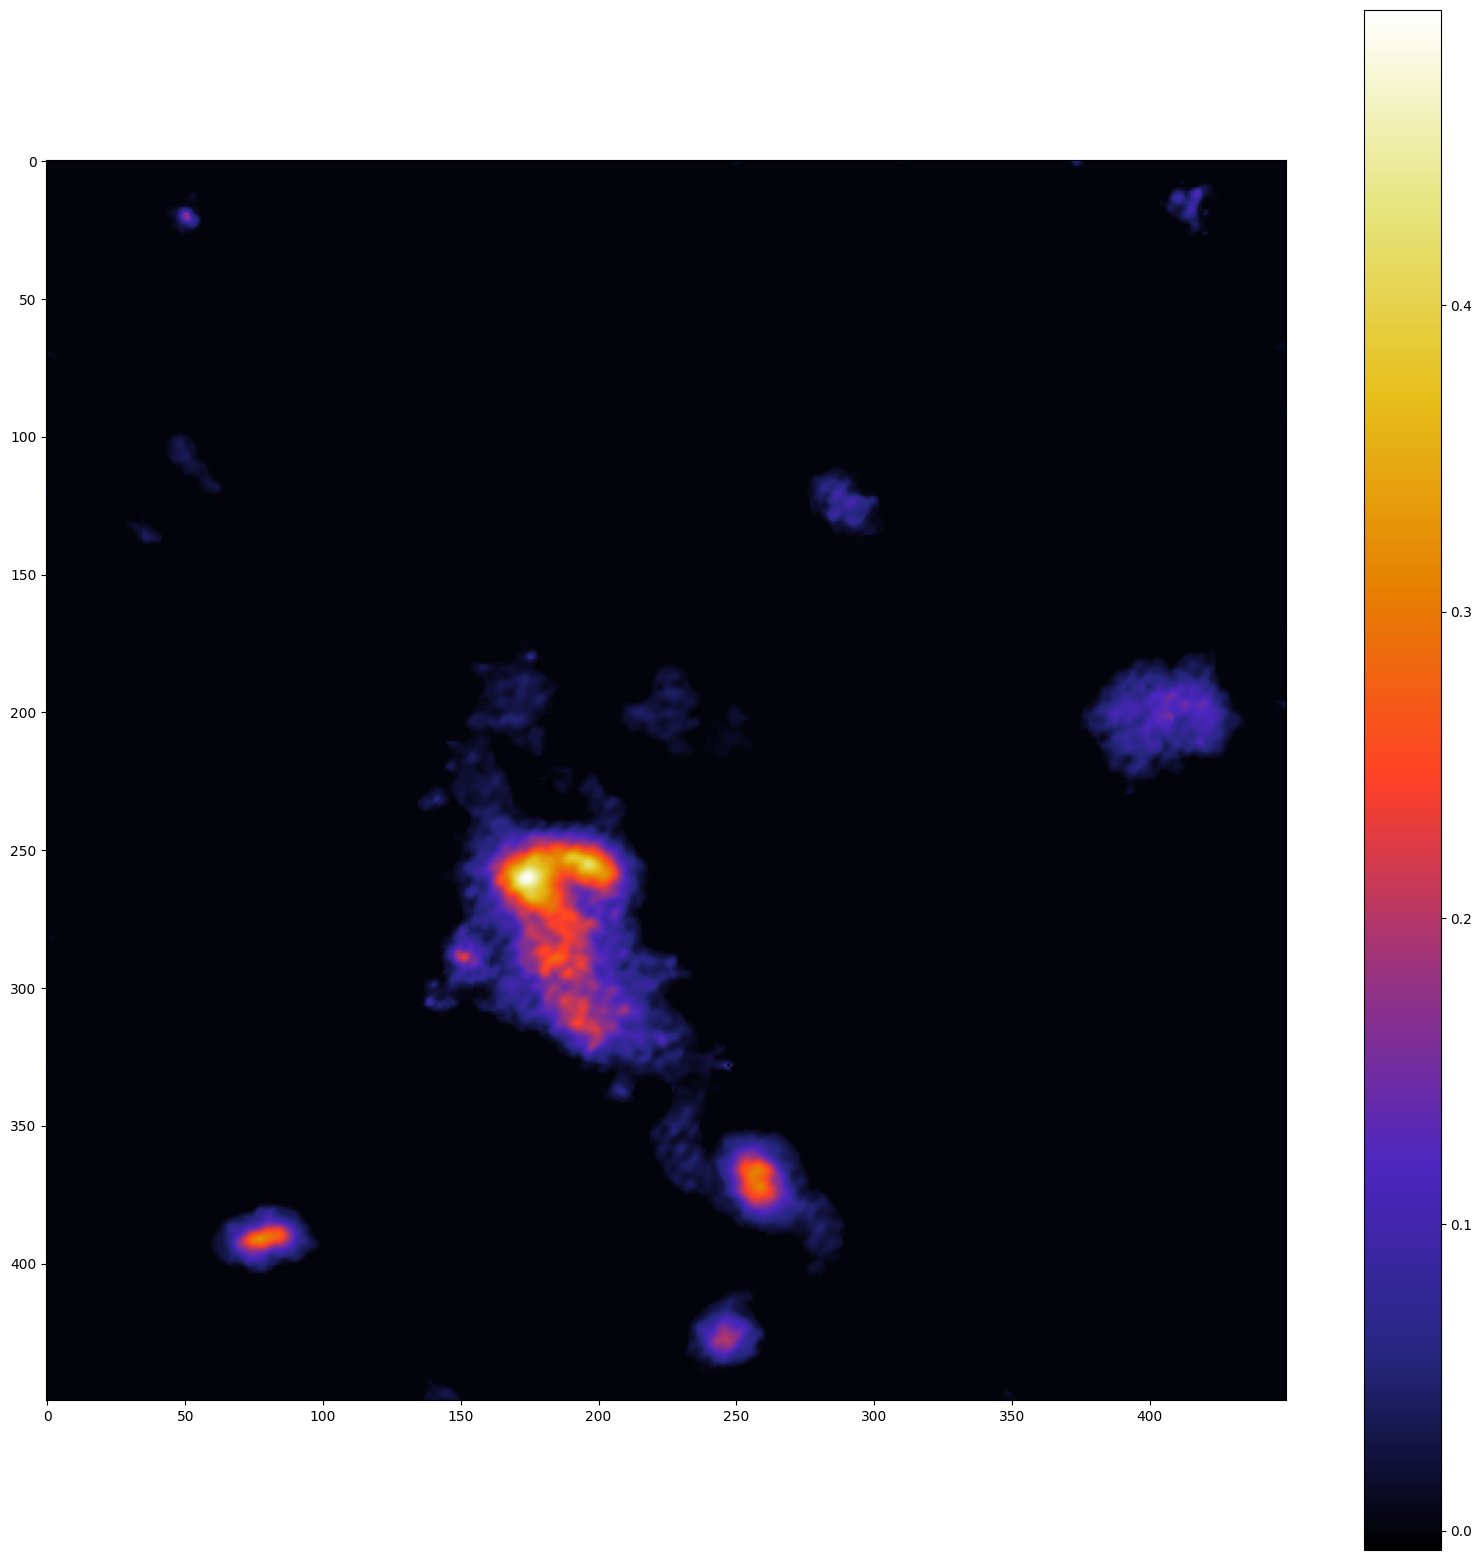

In [73]:
sweet = data_mom0[730:1180,836:1286]
sweet1 = data_mom1[730:1180,836:1286]

sweet_copy = np.copy(sweet)
sweet_copy_mom1 = np.copy(sweet1)

m = 450
l = 450
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if sweet_copy[i,j] != 0.0:
                flag = False
                for k in range(1,5):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if sweet_copy[i+k,j+k] == 0.0 and sweet_copy[i-k,j+k] == 0.0 and sweet_copy[i+k,j-k] == 0.0 and sweet_copy[i-k,j-k] == 0.0:
                            flag = True
                        if sweet_copy[i+k,j] == 0.0 and sweet_copy[i-k,j] == 0.0 and sweet_copy[i,j-k] == 0.0 and sweet_copy[i,j+k] == 0.0:
                            flag = True

                if sweet_copy_mom1[i,j] > 8545 or sweet_copy_mom1[i,j] < 7500:
                    flag = True

                if i < 851 and i>846 and j<1255 and j>1247 : 
                    flag = False
                
                if flag:
                    sweet_copy[i,j] = 0.0
                    sweet_copy_mom1[i,j] = math.nan  

print(HI_mass(sweet_copy,'sweet'))
print(flux(sweet_copy,'sweet'))

Sv = np.sum(np.sum(sweet_copy, axis=1))
MHI = 2.35*10**5*(Dl)**2*(Sv)*(1/Abeam)
logMHI = np.log10(MHI)
N = 0
for i in range(0,len(sweet_copy)):
    for j in range(0,len(sweet_copy[0])):
        N += 1
        
errsv = np.sqrt(N/Abeam)*dv*np.sqrt(np.mean(sweet_copy**2))
errMHI = (logMHI/np.log(10))*(errsv/Sv)

print(np.round(logMHI,2), np.round(errMHI,2))

plt.figure(figsize = (20,20))
plt.imshow(sweet_copy, cmap='CMRmap')
plt.colorbar()

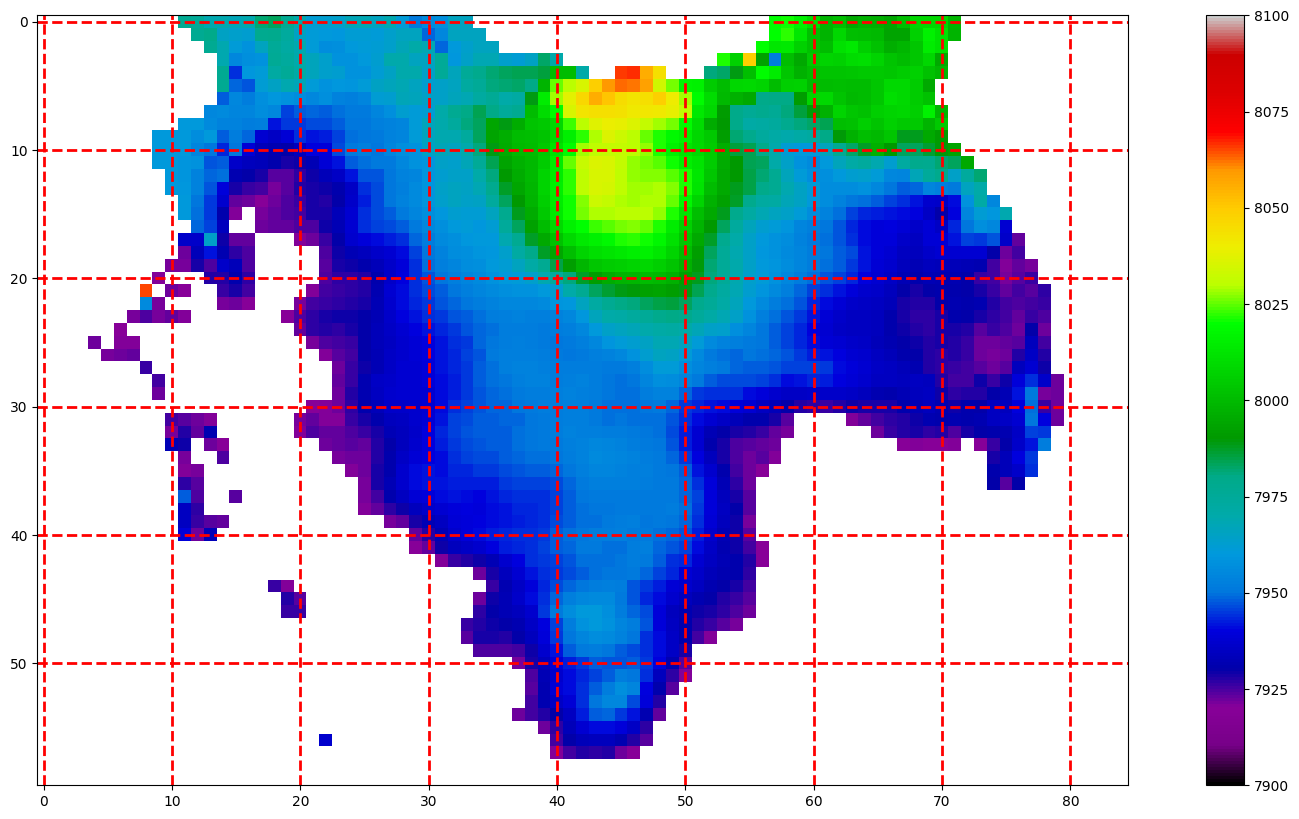

In [17]:
S3_real = S1237_copy[75:135, 25:110]
S3_real_mom1 = S1237_copy_mom1[75:135, 25:110]
for i in range(0, 60):
     for j in range(0, 85):
         if S3_real_mom1[i,j] < 7920 or S3_real_mom1[i,j] > 8100:
             S3_real[i,j] = 0.0
             S3_real_mom1[i,j] = math.nan
            


plt.figure(figsize = (20,10))
plt.imshow(S3_real_mom1, cmap='nipy_spectral', vmin=7900, vmax=8100)
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

$ 10.15 \pm 0.068 $ 14200141453.55
$ 3.76681 \pm 0.03 $ 5845.4


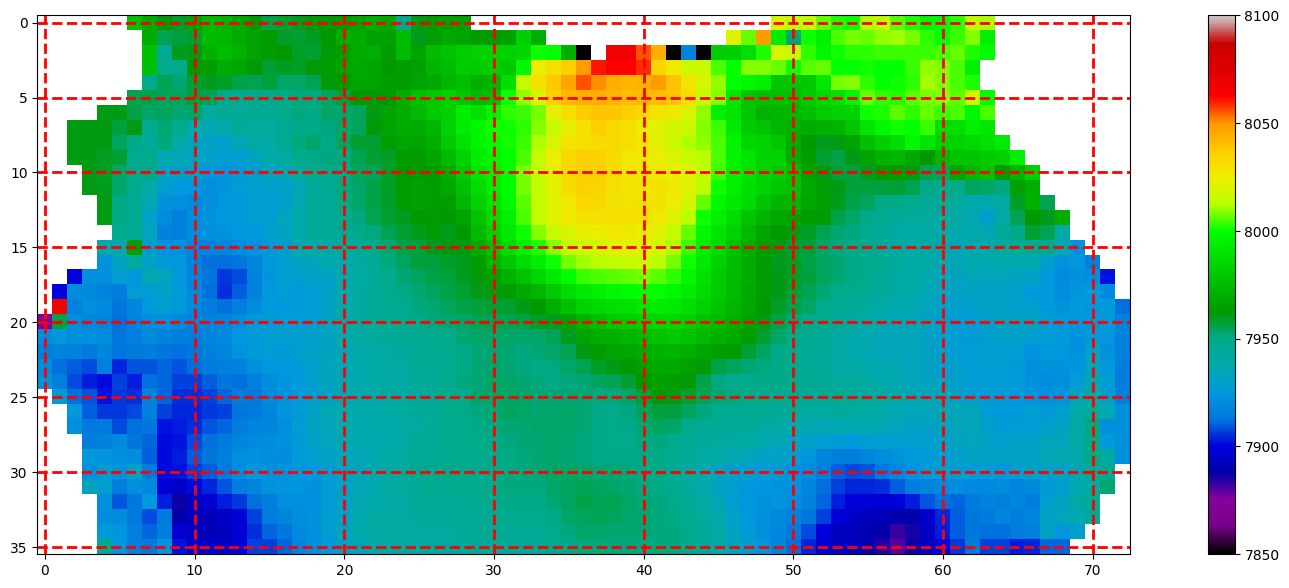

In [72]:
S3= data_mom0[967:1003,982:1055]
S3_mom1 = data_mom1[967:1003,982:1055]
S3_copy = np.copy(S3)
S3_copy_mom1 = np.copy(S3_mom1)
m = 35
l = 72
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if S3_copy[i,j] != 0.0:
                flag = False
                for k in range(1,6):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if S3_copy[i+k,j+k] == 0.0 and S3_copy[i-k,j+k] == 0.0 and S3_copy[i+k,j-k] == 0.0 and S3_copy[i-k,j-k] == 0.0:
                            flag = True
                        if S3_copy[i+k,j] == 0.0 and S3_copy[i-k,j] == 0.0 and S3_copy[i,j-k] == 0.0 and S3_copy[i,j+k] == 0.0:
                            flag = True

                if flag:
                    S3_copy[i,j] = 0.0
                    S3_copy_mom1[i,j] = math.nan          
        
print(HI_mass(S3_copy,'S3'))
print(flux(S3_copy,'S3'))

plt.figure(figsize = (20,7))
plt.imshow(S3_copy_mom1, cmap='nipy_spectral', vmin=7850, vmax=8100)
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

#gausspy+
#multicomponent fitting?
#baygaud


$ 9.73 \pm 0.039 $
$ 3.34 \pm 0.03 $


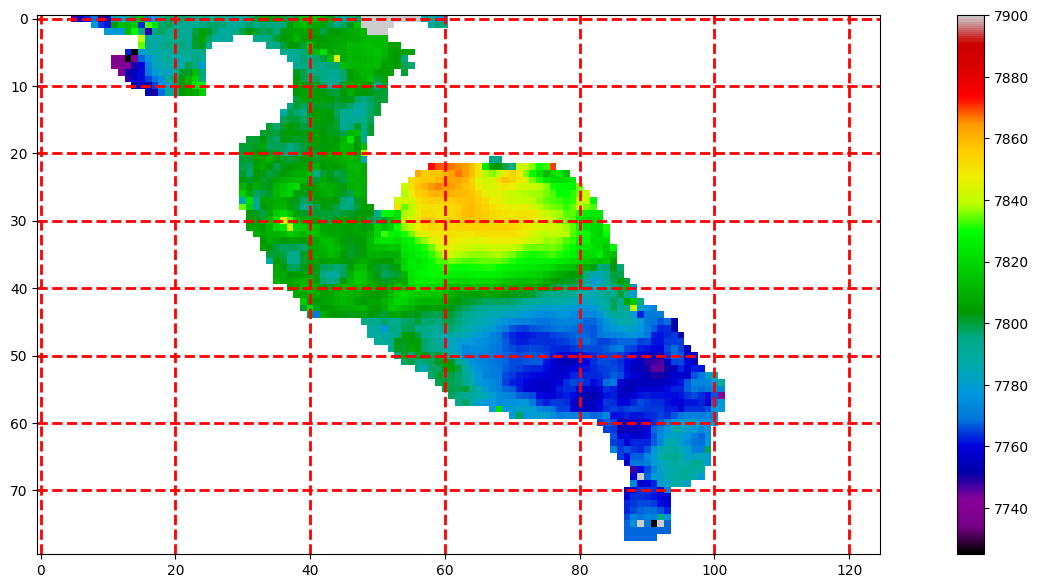

In [19]:
S2 = data_mom0[1060:1140,1025:1150]
S2_mom1 = data_mom1[1060:1140,1025:1150]
S2_copy = np.copy(S2)
S2_copy_mom1 = np.copy(S2_mom1)
m = 80
l = 125
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if S2_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if S2_copy[i+k,j+k] == 0.0 and S2_copy[i-k,j+k] == 0.0 and S2_copy[i+k,j-k] == 0.0 and S2_copy[i-k,j-k] == 0.0:
                            flag = True
                        if S2_copy[i+k,j] == 0.0 and S2_copy[i-k,j] == 0.0 and S2_copy[i,j-k] == 0.0 and S2_copy[i,j+k] == 0.0:
                            flag = True
                if i >= 78:
                    flag = True
                if i > 60 and j < 20:
                    flag = True
                if j > 120:
                    flag = True
               # if S2_copy_mom1[i,j] < 7740 or S2_copy_mom1[i,j] > 7900:
                  #  flag = True
                    
                if flag:
                    S2_copy[i,j] = 0.0
                    S2_copy_mom1[i,j] = math.nan  

print(HI_mass(S2_copy,'S2'))
print(flux(S2_copy,'S2'))
plt.figure(figsize = (20,7))
plt.imshow(S2_copy_mom1, cmap='nipy_spectral', vmin=7725, vmax=7900)
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

$ 10.14 \pm 0.043 $
$ 3.76 \pm 0.02 $


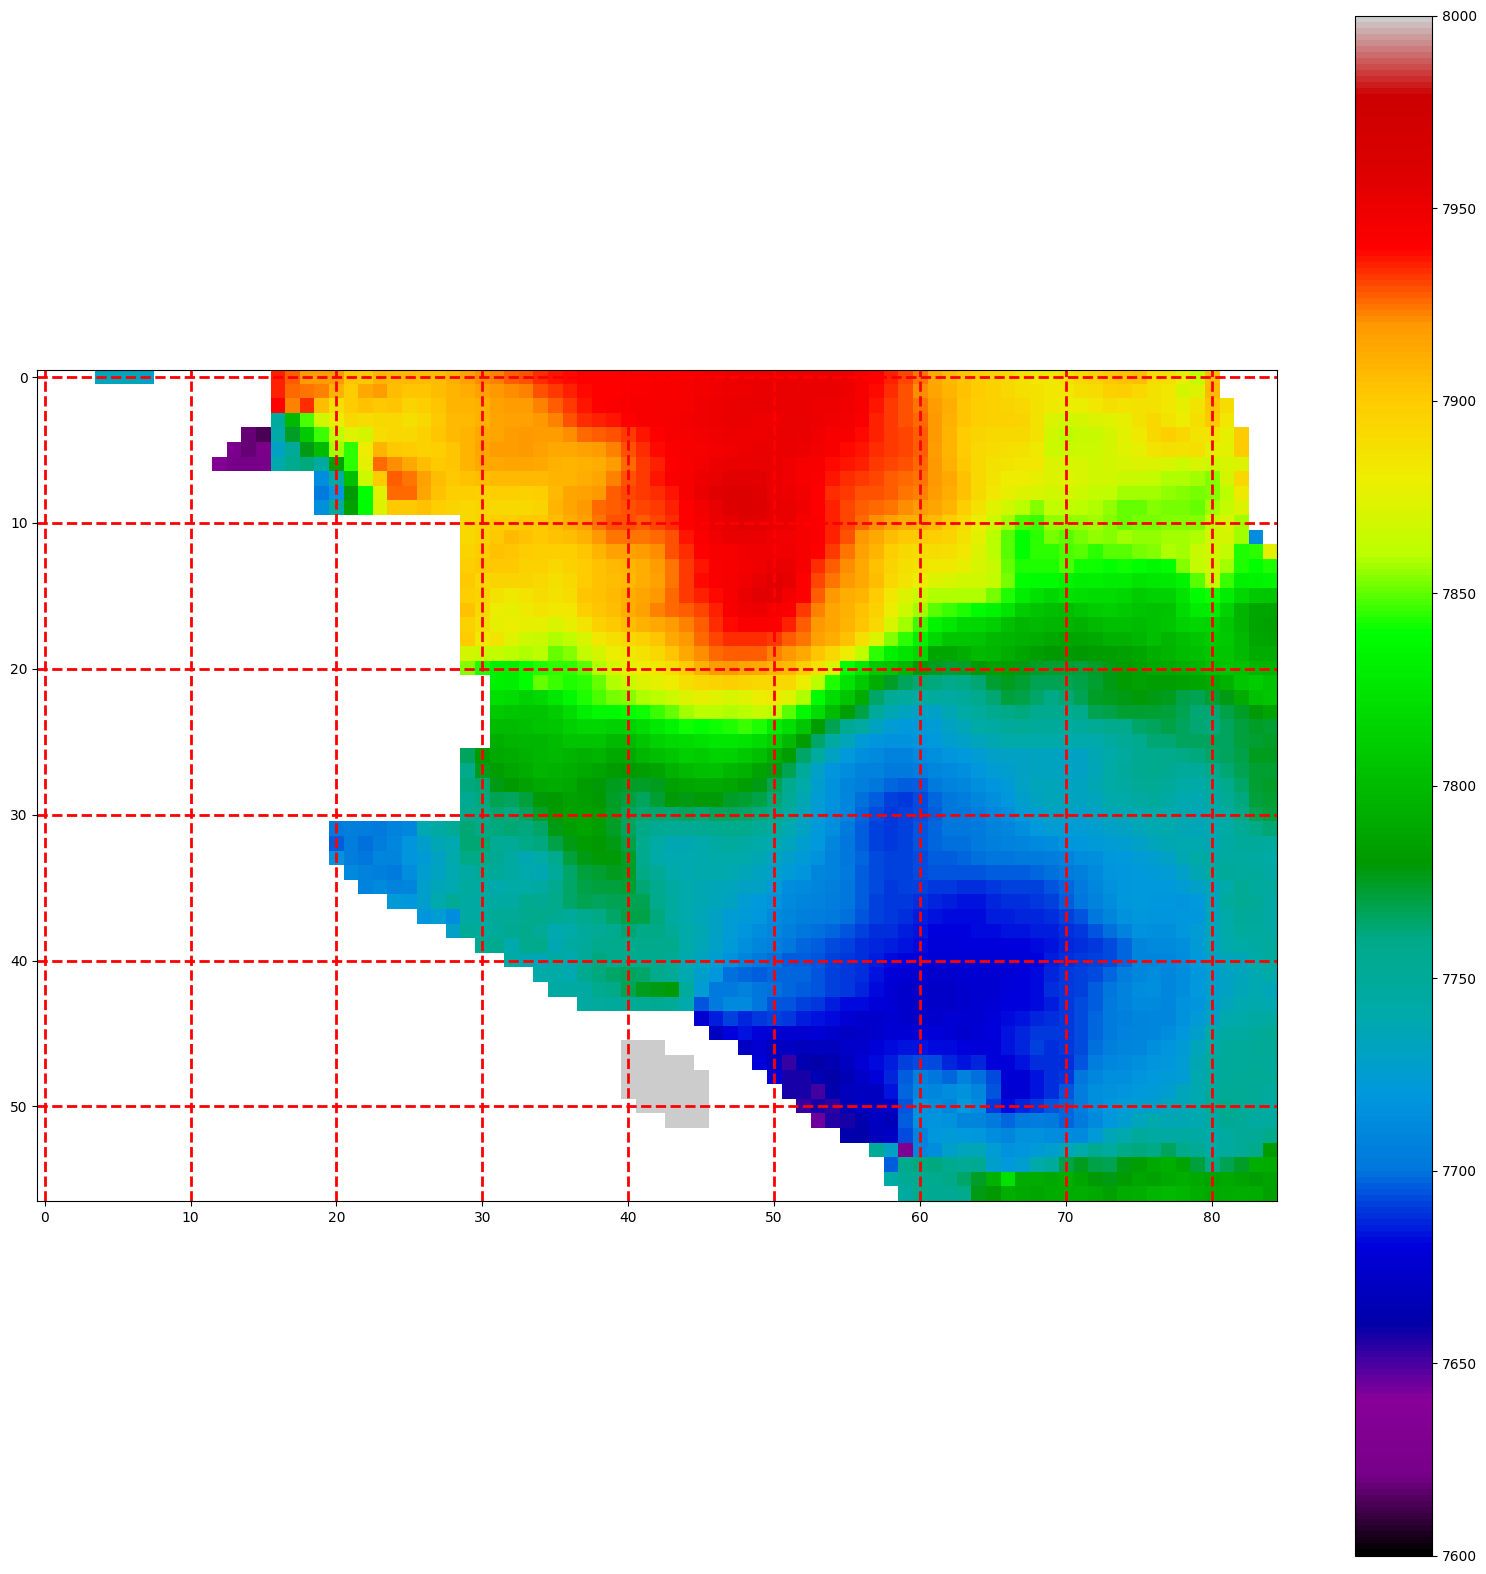

In [20]:
S1 = data_mom0[1003:1060,970:1055]
S1_mom1 = data_mom1[1003:1060,970:1055]
S1_copy = np.copy(S1)
S1_copy_mom1 = np.copy(S1_mom1)
for i in range(0, 85):
    for j in range(0, 57):
        if (j >= 7 and j<= 10) and i <= 18:
            S1_copy[j,i] = 0.0
            S1_copy_mom1[j,i] = math.nan
        if (j >= 21 and j <= 26) and i <=3:
            S1_copy[j,i] = 0.0
            S1_copy_mom1[j,i] = math.nan
        if (j >= 10 and j <= 20) and i <= 28:
            S1_copy[j,i] = 0.0
            S1_copy_mom1[j,i] = math.nan
        if (j >= 20 and j <= 40) and i <= 19:
            S1_copy[j,i] = 0.0
            S1_copy_mom1[j,i] = math.nan
        if i <= 31 and (j >= 31 and j <= 29):
            S1_copy[j,i] = 0.0
            S1_copy_mom1[j,i] = math.nan
        if (j >= 21 and j <= 25) and i <= 30:
            S1_copy[j,i] = 0.0
            S1_copy_mom1[j,i] = math.nan
        if (j >= 26 and j <= 30) and i <= 28:
            S1_copy[j,i] = 0.0
            S1_copy_mom1[j,i] = math.nan
    
print(HI_mass(S1_copy,'S1'))
print(flux(S1_copy,'S1'))
plt.figure(figsize = (20,20))
plt.imshow(S1_copy_mom1, cmap='nipy_spectral', vmin=7600, vmax=8000)
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [21]:
S4 = data_mom0[900:970,1200:1280]
S4_1 = data_mom1[900:970,1200:1280]

S4_copy = np.copy(S4)
S4_copy_mom1 = np.copy(S4_1)

m = 70
l = 80
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if S4_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if S4_copy[i+k,j+k] == 0.0 and S4_copy[i-k,j+k] == 0.0 and S4_copy[i+k,j-k] == 0.0 and S4_copy[i-k,j-k] == 0.0:
                            flag = True
                        if S4_copy[i+k,j] == 0.0 and S4_copy[i-k,j] == 0.0 and S4_copy[i,j-k] == 0.0 and S4_copy[i,j+k] == 0.0:
                            flag = True

                if i < 2:
                    flag  = True
                if j> 74:
                    flag = True
                    
                if flag:
                    S4_copy[i,j] = 0.0
                    S4_copy_mom1[i,j] = math.nan  

print(HI_mass(S4_copy,'S4'))
print(flux(S4_copy,'S4'))


$ 9.66 \pm 0.039 $
$ 3.27 \pm 0.02 $


In [22]:
S5 = data_mom0[1100:1140,890:940]
S5_1 = data_mom1[1100:1140,890:940]

S5_copy = np.copy(S5)
S5_copy_mom1 = np.copy(S5_1)

m = 40
l = 50
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if S5_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if S5_copy[i+k,j+k] == 0.0 and S5_copy[i-k,j+k] == 0.0 and S5_copy[i+k,j-k] == 0.0 and S5_copy[i-k,j-k] == 0.0:
                            flag = True
                        if S5_copy[i+k,j] == 0.0 and S5_copy[i-k,j] == 0.0 and S5_copy[i,j-k] == 0.0 and S5_copy[i,j+k] == 0.0:
                            flag = True

                if j <2:
                    flag = True
                    
                if flag:
                    S5_copy[i,j] = 0.0
                    S5_copy_mom1[i,j] = math.nan  

print(HI_mass(S5_copy,'S5'))
print(flux(S5_copy,'S5'))


$ 9.41 \pm 0.071 $
$ 3.03 \pm 0.04 $


In [23]:
S6 = data_mom0[1130:1180,1065:1100]
S6_1 = data_mom1[1130:1180,1065:1100]

S6_copy = np.copy(S6)
S6_copy_mom1 = np.copy(S6_1)

m = 50
l = 35
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if S6_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if S6_copy[i+k,j+k] == 0.0 and S6_copy[i-k,j+k] == 0.0 and S6_copy[i+k,j-k] == 0.0 and S6_copy[i-k,j-k] == 0.0:
                            flag = True
                        if S6_copy[i+k,j] == 0.0 and S6_copy[i-k,j] == 0.0 and S6_copy[i,j-k] == 0.0 and S6_copy[i,j+k] == 0.0:
                            flag = True
                    
                if flag:
                    S6_copy[i,j] = 0.0
                    S6_copy_mom1[i,j] = math.nan  

print(HI_mass(S6_copy,'S6'))
print(flux(S6_copy,'S6'))

$ 9.2 \pm 0.073 $
$ 2.82 \pm 0.04 $


$ 9.14 \pm 0.089 $
$ 2.75 \pm 0.04 $


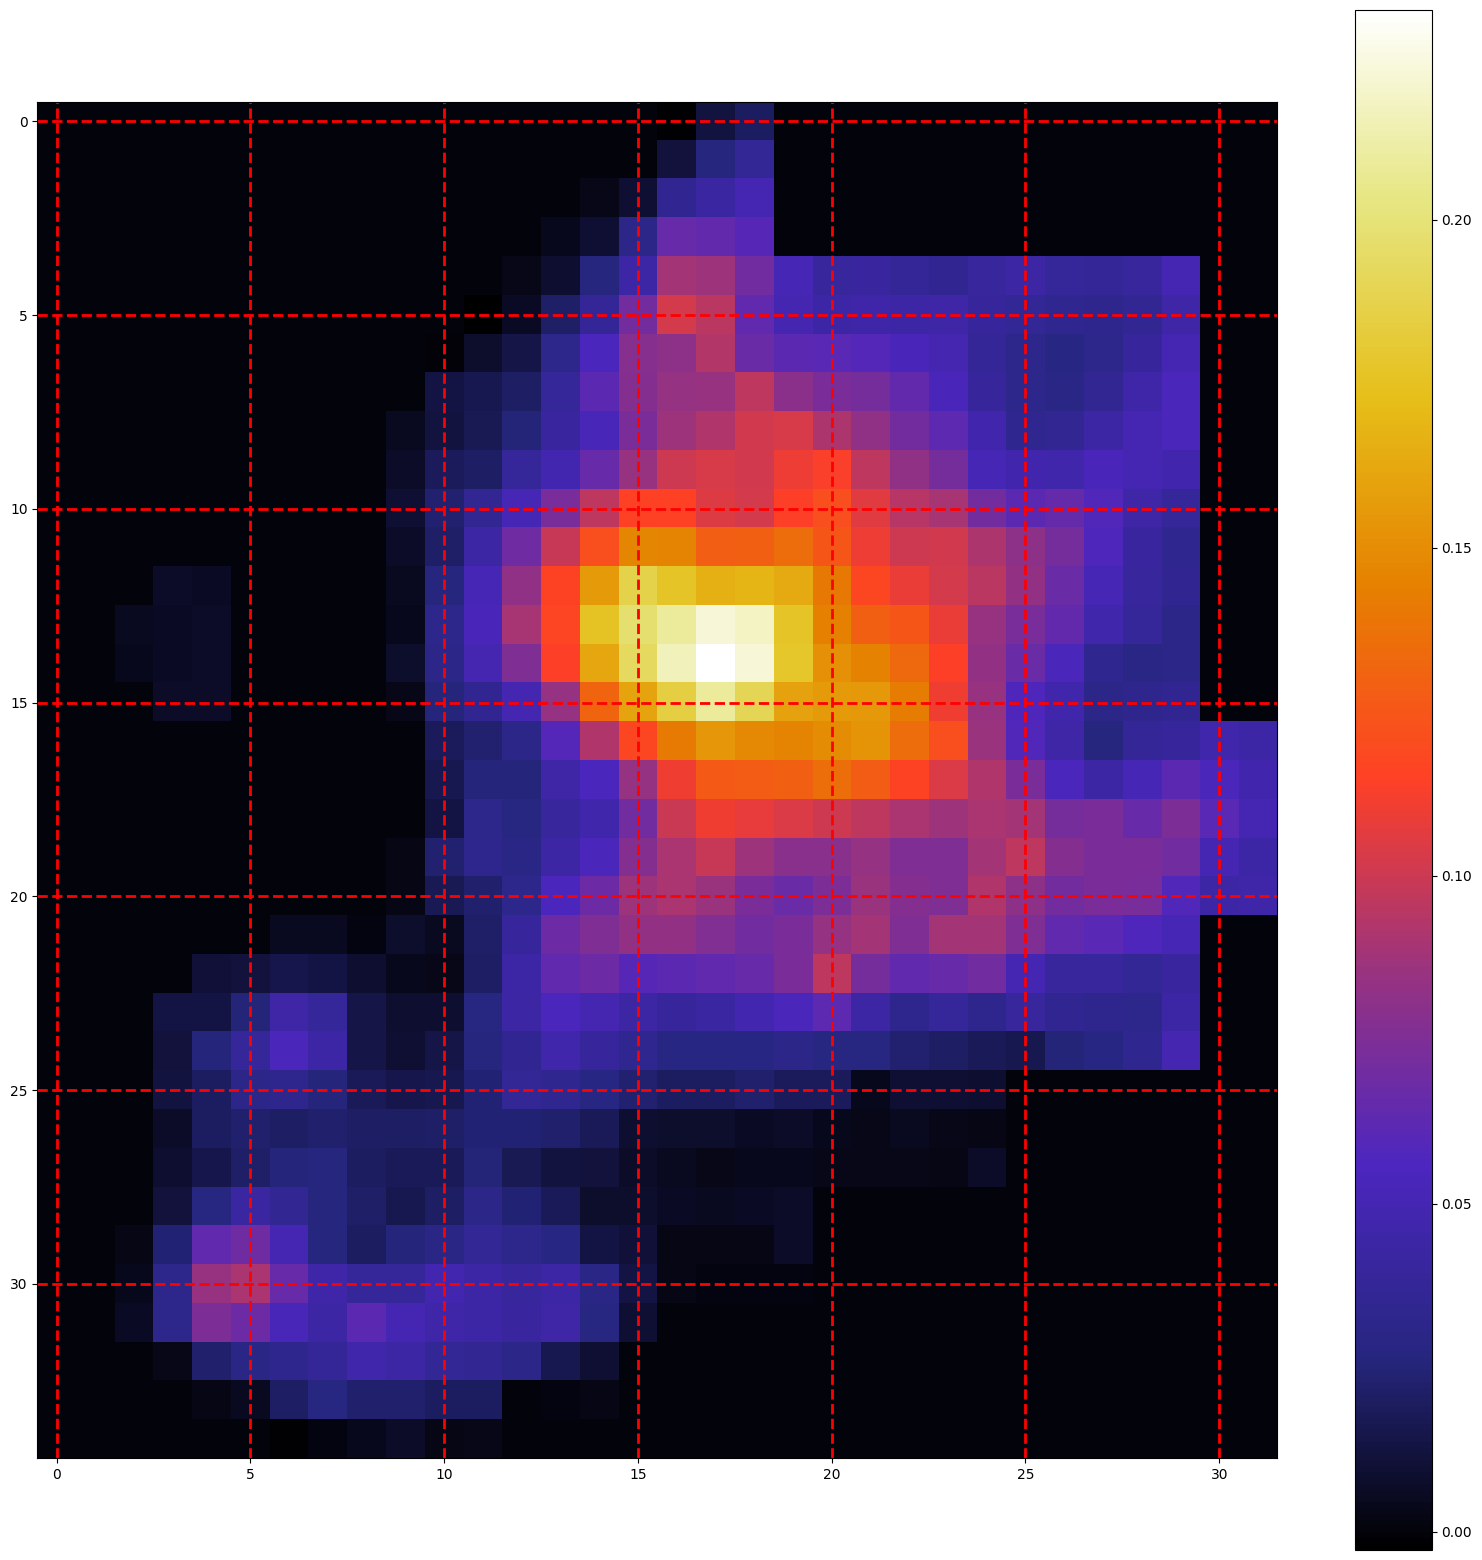

In [24]:
S7 = data_mom0[1005:1040,970:1002]
S7_copy = np.copy(S7)
for i in range(0, 32):
    for j in range(0, 35):
        if i >= 19 and j <= 3:
            S7_copy[j,i] = 0.0
        if i >= 25 and j >= 25:
            S7_copy[j,i] = 0.0
        if i >= 30 and j <= 15:
            S7_copy[j,i] = 0.0
        if i >= 30 and j >= 21:
            S7_copy[j,i] = 0.0
        if i >= 20 and j >= 28:
            S7_copy[j,i] = 0.0
print(HI_mass(S7_copy,'S7'))
print(flux(S7_copy,'S7'))
plt.figure(figsize = (20,20))
plt.imshow(S7_copy, cmap='CMRmap')
plt.colorbar()
plt.grid(color='r', linestyle='--', linewidth=2)

In [25]:
S9 = data_mom0[846:851,1247:1255]
S9_1 = data_mom1[846:851,1247:1255]

S9_copy = np.copy(S9)
S9_copy_mom1 = np.copy(S9_1)

m = 5
l = 8
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if S9_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if S9_copy[i+k,j+k] == 0.0 and S9_copy[i-k,j+k] == 0.0 and S9_copy[i+k,j-k] == 0.0 and S9_copy[i-k,j-k] == 0.0:
                            flag = True
                        if S9_copy[i+k,j] == 0.0 and S9_copy[i-k,j] == 0.0 and S9_copy[i,j-k] == 0.0 and S9_copy[i,j+k] == 0.0:
                            flag = True


                    
                if flag:
                    S9_copy[i,j] = 0.0
                    S9_copy_mom1[i,j] = math.nan  

print(HI_mass(S9_copy,'S9'))
print(flux(S9_copy,'S9'))

$ 6.86 \pm 0.329 $
$ 0.47 \pm 0.04 $


In [26]:
S10 = data_mom0[830:880,1100:1150]
S10_1 = data_mom1[830:880,1100:1150]

S10_copy = np.copy(S10)
S10_copy_mom1 = np.copy(S10_1)

m = 50
l = 50
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if S10_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if S10_copy[i+k,j+k] == 0.0 and S10_copy[i-k,j+k] == 0.0 and S10_copy[i+k,j-k] == 0.0 and S10_copy[i-k,j-k] == 0.0:
                            flag = True
                        if S10_copy[i+k,j] == 0.0 and S10_copy[i-k,j] == 0.0 and S10_copy[i,j-k] == 0.0 and S10_copy[i,j+k] == 0.0:
                            flag = True
                            
                if i >=49 or j >= 49:
                    flag = True
                    
                if flag:
                    S10_copy[i,j] = 0.0
                    S10_copy_mom1[i,j] = math.nan  

print(HI_mass(S10_copy,'S10'))
print(flux(S10_copy,'S10'))

$ 8.88 \pm 0.056 $
$ 2.49 \pm 0.03 $


In [27]:
N1 = data_mom0[1370:1500,1160:1230]
N1_1 = data_mom1[1370:1500,1160:1230]

N1_copy = np.copy(N1)
N1_copy_mom1 = np.copy(N1_1)

m = 130
l = 70
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N1_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N1_copy[i+k,j+k] == 0.0 and N1_copy[i-k,j+k] == 0.0 and N1_copy[i+k,j-k] == 0.0 and N1_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N1_copy[i+k,j] == 0.0 and N1_copy[i-k,j] == 0.0 and N1_copy[i,j-k] == 0.0 and N1_copy[i,j+k] == 0.0:
                            flag = True
                    
                if N1_copy_mom1[i,j] > 8400 or N1_copy_mom1[i,j] < 7800:
                    flag = True

                if j<3 or i > 120:
                    flag = True
                    
                if flag:
                    N1_copy[i,j] = 0.0
                    N1_copy_mom1[i,j] = math.nan  

print(HI_mass(N1_copy,'N1'))
print(flux(N1_copy,'N1'))

$ 10.11 \pm 0.034 $
$ 3.72 \pm 0.02 $


In [28]:
N2 = data_mom0[550:750,450:650]
N2_1 = data_mom1[550:750,450:650]

N2_copy = np.copy(N2)
N2_copy_mom1 = np.copy(N2_1)

m = 200
l = 200
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N2_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N2_copy[i+k,j+k] == 0.0 and N2_copy[i-k,j+k] == 0.0 and N2_copy[i+k,j-k] == 0.0 and N2_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N2_copy[i+k,j] == 0.0 and N2_copy[i-k,j] == 0.0 and N2_copy[i,j-k] == 0.0 and N2_copy[i,j+k] == 0.0:
                            flag = True

                if j > 175 or j < 5:
                    flag = True
                if i < 25:
                    flag = True
                if j > 100 and i > 120:
                    flag = True
                if i < 75 and j < 75:
                    flag = True
                if i > 75 and i < 85 and j < 80:
                    flag = True
                
                if flag:
                    N2_copy[i,j] = 0.0
                    N2_copy_mom1[i,j] = math.nan  

print(HI_mass(N2_copy,'N2'))
print(flux(N2_copy,'N2'))

$ 10.28 \pm 0.019 $
$ 3.89 \pm 0.02 $


In [29]:
N3 = data_mom0[1970:2020,580:630]
N3_1 = data_mom1[1970:2020,580:630]

N3_copy = np.copy(N3)
N3_copy_mom1 = np.copy(N3_1)

m = 50
l = 50
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N3_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N3_copy[i+k,j+k] == 0.0 and N3_copy[i-k,j+k] == 0.0 and N3_copy[i+k,j-k] == 0.0 and N3_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N3_copy[i+k,j] == 0.0 and N3_copy[i-k,j] == 0.0 and N3_copy[i,j-k] == 0.0 and N3_copy[i,j+k] == 0.0:
                            flag = True

                if i > 48:
                    flag = True
                if flag:
                    N3_copy[i,j] = 0.0
                    N3_copy_mom1[i,j] = math.nan  

print(HI_mass(N3_copy,'N3'))
print(flux(N3_copy,'N3'))

$ 9.03 \pm 0.06 $
$ 2.64 \pm 0.03 $


In [30]:
N4 = data_mom0[150:190,800:850]
N4_1 = data_mom1[150:190,800:850]

N4_copy = np.copy(N4)
N4_copy_mom1 = np.copy(N4_1)

m = 40
l = 50
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N4_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N4_copy[i+k,j+k] == 0.0 and N4_copy[i-k,j+k] == 0.0 and N4_copy[i+k,j-k] == 0.0 and N4_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N4_copy[i+k,j] == 0.0 and N4_copy[i-k,j] == 0.0 and N4_copy[i,j-k] == 0.0 and N4_copy[i,j+k] == 0.0:
                            flag = True

                if j >= 39 or i > 49:
                    flag = True
                if flag:
                    N4_copy[i,j] = 0.0
                    N4_copy_mom1[i,j] = math.nan  

print(HI_mass(N4_copy,'N4'))
print(flux(N4_copy,'N4'))

$ 8.98 \pm 0.061 $
$ 2.59 \pm 0.03 $


In [31]:
N5 = data_mom0[0:40,2000:2048]
N5_1 = data_mom1[0:40,2000:2048]

N5_copy = np.copy(N5)
N5_copy_mom1 = np.copy(N5_1)

m = 40
l = 48
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N5_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N5_copy[i+k,j+k] == 0.0 and N5_copy[i-k,j+k] == 0.0 and N5_copy[i+k,j-k] == 0.0 and N5_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N5_copy[i+k,j] == 0.0 and N5_copy[i-k,j] == 0.0 and N5_copy[i,j-k] == 0.0 and N5_copy[i,j+k] == 0.0:
                            flag = True

                if i >= 15 and j <= 5:
                    flag = True
                    
                if flag:
                    N5_copy[i,j] = 0.0
                    N5_copy_mom1[i,j] = math.nan  

print(HI_mass(N5_copy,'N5'))
print(flux(N5_copy,'N5'))

$ 9.02 \pm 0.064 $
$ 2.63 \pm 0.03 $


In [32]:
N6 = data_mom0[900:950,410:450]
N6_1 = data_mom1[900:950,410:450]

N6_copy = np.copy(N6)
N6_copy_mom1 = np.copy(N6_1)

m = 50
l = 40
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N6_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N6_copy[i+k,j+k] == 0.0 and N6_copy[i-k,j+k] == 0.0 and N6_copy[i+k,j-k] == 0.0 and N6_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N6_copy[i+k,j] == 0.0 and N6_copy[i-k,j] == 0.0 and N6_copy[i,j-k] == 0.0 and N6_copy[i,j+k] == 0.0:
                            flag = True

                
                if flag:
                    N6_copy[i,j] = 0.0
                    N6_copy_mom1[i,j] = math.nan  

print(HI_mass(N6_copy,'N6'))
print(flux(N6_copy,'N6'))

$ 9.02 \pm 0.062 $
$ 2.64 \pm 0.03 $


In [33]:
N7 = data_mom0[1345:1365,1760:1785]
N7_1 = data_mom1[1345:1365,1760:1785]

N7_copy = np.copy(N7)
N7_copy_mom1 = np.copy(N7_1)

m = 20
l = 25
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N7_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N7_copy[i+k,j+k] == 0.0 and N7_copy[i-k,j+k] == 0.0 and N7_copy[i+k,j-k] == 0.0 and N7_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N7_copy[i+k,j] == 0.0 and N7_copy[i-k,j] == 0.0 and N7_copy[i,j-k] == 0.0 and N7_copy[i,j+k] == 0.0:
                            flag = True

                if N7_copy_mom1[i,j] > 8400:
                    flag = True
                if flag:
                    N7_copy[i,j] = 0.0
                    N7_copy_mom1[i,j] = math.nan  

print(HI_mass(N7_copy,'N7'))
print(flux(N7_copy,'N7'))

$ 7.89 \pm 0.116 $
$ 1.5 \pm 0.04 $


In [34]:
N8 = data_mom0[530:570,1010:1060]
N8_1 = data_mom1[530:570,1010:1060]

N8_copy = np.copy(N8)
N8_copy_mom1 = np.copy(N8_1)

m = 40
l = 50
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N8_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N8_copy[i+k,j+k] == 0.0 and N8_copy[i-k,j+k] == 0.0 and N8_copy[i+k,j-k] == 0.0 and N8_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N8_copy[i+k,j] == 0.0 and N8_copy[i-k,j] == 0.0 and N8_copy[i,j-k] == 0.0 and N8_copy[i,j+k] == 0.0:
                            flag = True

                
                if flag:
                    N8_copy[i,j] = 0.0
                    N8_copy_mom1[i,j] = math.nan  

print(HI_mass(N8_copy,'N8'))
print(flux(N8_copy,'N8'))

$ 8.86 \pm 0.061 $
$ 2.47 \pm 0.03 $


In [35]:
N9 = data_mom0[1268:1290,1138:1166]
N9_1 = data_mom1[1268:1290,1138:1166]

N9_copy = np.copy(N9)
N9_copy_mom1 = np.copy(N9_1)

m = 22
l = 28
for n in range(100):
    for i in range(0, m):
        for j in range(0, l):
            if N9_copy[i,j] != 0.0:
                flag = False
                for k in range(1,4):
                    if i < (m-k) and j < (l-k) and i > k and j > k:
                        if N9_copy[i+k,j+k] == 0.0 and N9_copy[i-k,j+k] == 0.0 and N9_copy[i+k,j-k] == 0.0 and N9_copy[i-k,j-k] == 0.0:
                            flag = True
                        if N9_copy[i+k,j] == 0.0 and N9_copy[i-k,j] == 0.0 and N9_copy[i,j-k] == 0.0 and N9_copy[i,j+k] == 0.0:
                            flag = True

                
                if flag:
                    N9_copy[i,j] = 0.0
                    N9_copy_mom1[i,j] = math.nan  

print(HI_mass(N9_copy,'N9'))
print(flux(N9_copy,'N9'))

$ 8.28 \pm 0.107 $
$ 1.89 \pm 0.04 $


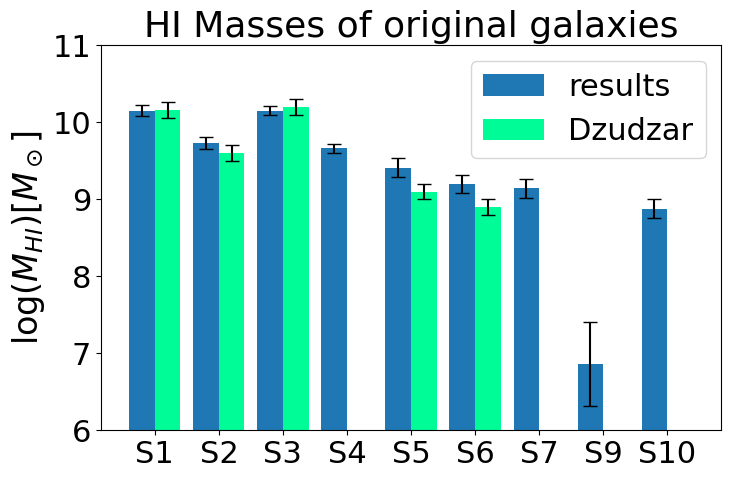

0.0984251968503916
1.354166666666675
0.49019607843136215
unknown
3.4065934065934127
3.370786516853921
unknown
unknown
unknown
1.7440335730791525


In [4]:

masses = np.array([10.15,9.73,10.15,9.66,9.41,9.2,9.14,6.86,8.88])
names = np.array(['S1','S2','S3','S4','S5','S6','S7','S9','S10'])
errmass = np.array([0.07,0.08,0.06,0.06,0.12,0.12,0.12,0.55,0.12])
dzudmass = np.array([10.16,9.6,10.2,0,9.1,8.9,0,0,0])
errdzud = np.array([0.1,0.1,0.1,0,0.1,0.1,0,0,0])
width = 0.4
plt.style.use('default')
y_pos = np.arange(len(masses))
plt.figure(figsize = (8,5))
plt.bar(y_pos-width/2, masses, width, yerr= errmass, capsize = 5, label = 'results')
plt.bar(y_pos+width/2, dzudmass,width, yerr= errdzud, capsize = 5, color = '#00fc97', label = 'Dzudzar')
plt.xticks(y_pos, names, fontsize = 22)
plt.yticks(fontsize = 22)
plt.legend(fontsize = 22)
plt.ylabel(r'log$\left(M_{HI}\right) [M_\odot]$', fontsize = 24)
plt.title('HI Masses of original galaxies', fontsize = 26)
plt.ylim(6,11)
plt.savefig('ogmasses.pdf',bbox_inches = 'tight')
plt.show()
for i in range(0,9):
    if dzudmass[i] !=0:
        print((np.abs((masses[i])-(dzudmass[i]))/(dzudmass[i]))*100)
    else:
        print('unknown')

print(np.mean([0.0984251968503916,1.354166666666675,0.49019607843136215,3.4065934065934127,3.370786516853921]))

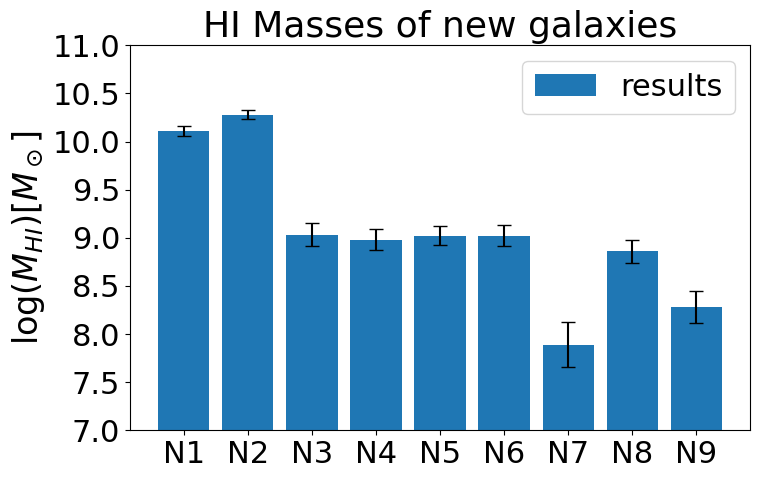

In [3]:
masses = np.array([10.11,10.28,9.03,8.98,9.02,9.02,7.89,8.86,8.28])
names = np.array(['N1','N2','N3','N4','N5','N6','N7','N8','N9'])
errmass = np.array([0.05,0.05,0.12,0.11,0.1,0.11,0.23,0.12,0.17])
plt.figure(figsize = (8,5))
plt.bar(y_pos, masses, yerr= errmass, capsize = 5, label = 'results')
#plt.bar(y_pos+width/2, dzudmass,width, yerr= errdzud, capsize = 5, color = '#00fc97', label = 'Dzudzar')
plt.xticks(y_pos, names, fontsize = 22)
plt.yticks(fontsize = 22)
plt.legend(fontsize = 22)

plt.ylabel(r'log$\left(M_{HI}\right) [M_\odot]$', fontsize = 24)
plt.title('HI Masses of new galaxies', fontsize = 26)
plt.ylim(7,11)
plt.savefig('newmasses.pdf',bbox_inches = 'tight')

Text(0.5, 1.0, 'HI Masses of new galaxies')

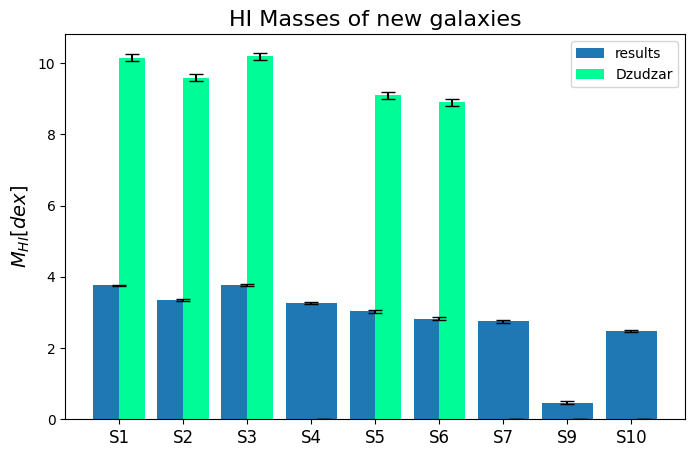

In [38]:
masses = np.array([3.76,3.34,3.77,3.27,3.03,2.82,2.75,0.47,2.49])
names = np.array(['S1','S2','S3','S4','S5','S6','S7','S9','S10'])
errmass = np.array([0.02,0.03,0.03,0.02,0.04,0.04,0.04,0.04,0.03])
plt.figure(figsize = (8,5))
plt.bar(y_pos, masses, yerr= errmass, capsize = 5, label = 'results')
plt.bar(y_pos+width/2, dzudmass,width, yerr= errdzud, capsize = 5, color = '#00fc97', label = 'Dzudzar')
plt.xticks(y_pos, names, fontsize = 12)
plt.legend()
plt.ylabel(r'$M_{HI} [dex]$', fontsize = 14)
plt.title('HI Masses of new galaxies', fontsize = 16)
#plt.ylim(7,11)
#plt.savefig('newmasses.pdf',bbox_inches = 'tight')

Text(0.5, 1.0, 'HI Masses of new galaxies')

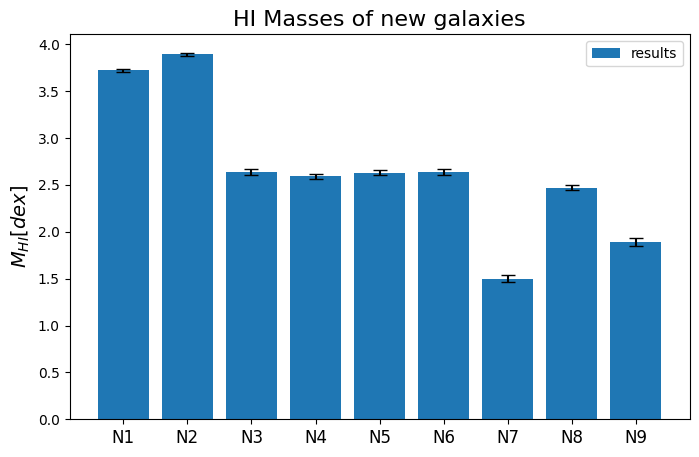

In [39]:
masses = np.array([3.72,3.89,2.64,2.59,2.63,2.64,1.5,2.47,1.89])
names = np.array(['N1','N2','N3','N4','N5','N6','N7','N8','N9'])
errmass = np.array([0.02,0.02,0.03,0.03,0.03,0.03,0.04,0.03,0.04])
plt.figure(figsize = (8,5))
plt.bar(y_pos, masses, yerr= errmass, capsize = 5, label = 'results')
#plt.bar(y_pos+width/2, dzudmass,width, yerr= errdzud, capsize = 5, color = '#00fc97', label = 'Dzudzar')
plt.xticks(y_pos, names, fontsize = 12)
plt.legend()
plt.ylabel(r'$M_{HI} [dex]$', fontsize = 14)
plt.title('HI Masses of new galaxies', fontsize = 16)
#plt.ylim(7,11)
#plt.savefig('newmasses.pdf',bbox_inches = 'tight')

In [76]:
10.42 
10.68 
0.03

(((10.68)-(10.42))/(10.42))*100

((1.3799 + 1.3848)/2)*1000

1382.35